In [250]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from IPython.display import display

train = pd.read_csv('train.csv')
train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
778,779,90,RH,60.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,144000
478,479,20,RL,79.0,10637,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,297000
747,748,70,RM,65.0,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,265979
841,842,70,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,157500
1309,1310,20,RL,NaN,7153,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,6,2008,WD,Normal,179200


In [251]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Summary

- Write here

# Analysis

In [252]:
# checking for missing values
train.apply(lambda x: sum(x.isnull()),axis=0) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Remove features where missing values are more than X%  of total number of rows to avoid overfitting?

## Sale Price

Is it necessary to adjust by inflation?

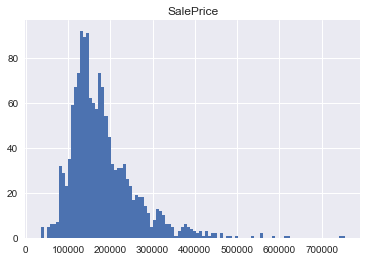

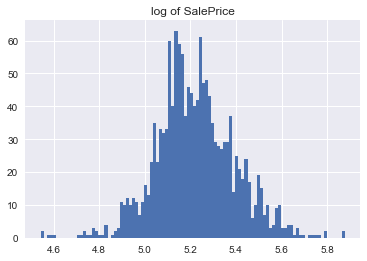

In [253]:
def plot_histogram(dataset, column, bins=100):
    dataset.hist(column=column, bins=bins)
    dataset['log of '+column] = np.log10(dataset[column])
    dataset.hist(column='log of '+column, bins=bins)

plot_histogram(train, 'SalePrice')

It may be better to use log of sale price. skewness tends to negatively affect the performance of machine learning algorithms

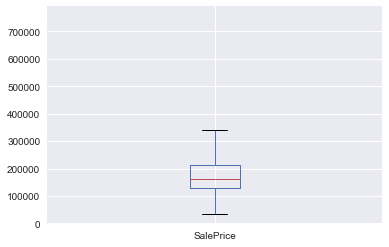

In [254]:
train.boxplot(column='SalePrice')

In [255]:
def r_squared(dataset, x_column, y_column):
    # if nan, get rows out
    x = np.array(dataset[x_column])
    y = np.array(dataset[y_column])

    x = x.reshape(dataset.shape[0], 1)
    y = y.reshape(dataset.shape[0], 1)

    model = LinearRegression()
    model.fit(x, y)
    print('R^2 = %f' % model.score(x, y))
    
def scatter_plot(dataset, x_column, y_column):
    dataset = dataset.dropna(subset=[x_column])
    sns.lmplot(x=x_column, y=y_column, data=dataset, fit_reg=True, aspect=2)
    r_squared(dataset, x_column, y_column)


### Analysis

Write analysis here.

## Building Class


MSSubClass    0
dtype: int64

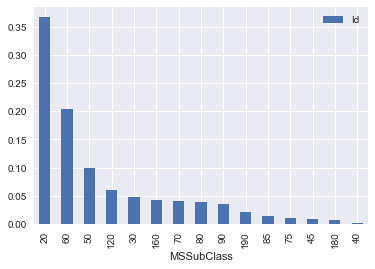

In [256]:
def plot_category_distribution(dataset, column_name):
    (dataset[['Id',column_name]].groupby(column_name).count()/dataset.shape[0]).sort_values(by='Id',ascending=0).plot(kind='bar')
    #(dataset[['Id',column_name]].groupby(column_name).count()/dataset.shape[0]).plot(kind='bar')

display(train[['MSSubClass']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'MSSubClass')

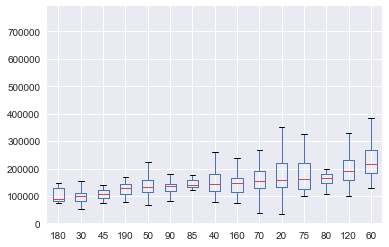

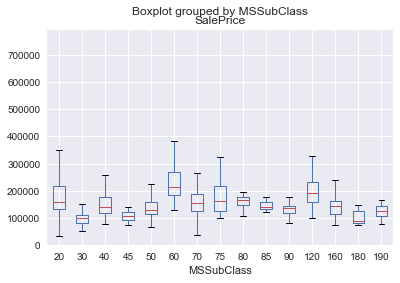

In [257]:
def boxplot_sorted(dataset, by, column):
    dataset = pd.DataFrame({col:vals[column] for col, vals in dataset.groupby(by)})
    medians = dataset.median().sort_values()
    return dataset[medians.index].boxplot()

def plot_category_correlation(dataset, column_name):
    boxplot_sorted(dataset, column_name, 'SalePrice')
    dataset.boxplot(column='SalePrice', by=column_name)
    
plot_category_correlation(train, 'MSSubClass')

### Analysis

This feature must be transformed one way or another. To avoid one-hot encoding, we may have to assume an order on the classes (based on median of SalePrice?). This could induce the correlation showed above.

It may also make sense to group "similar" classes, although of course deciding how to group them may be an issue.

That said, that seems to be a Paretto when looking at class distribution. Classes 20 and 60 amount to more than 55% of data. 

## General Zoning Classification

MSZoning    0
dtype: int64

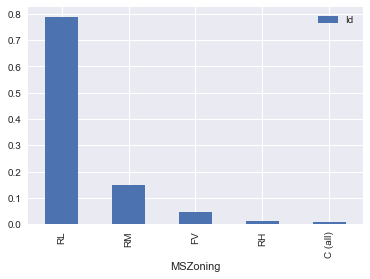

In [258]:
display(train[['MSZoning']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'MSZoning')

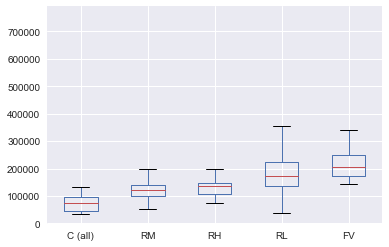

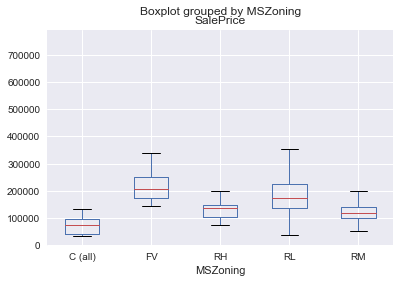

In [259]:
plot_category_correlation(train, 'MSZoning')

### Analysis

Write analysis here.

## Linear feet of street connected to property


LotFrontage    259
dtype: int64

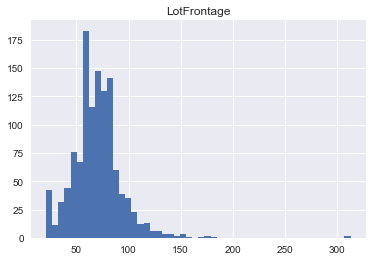

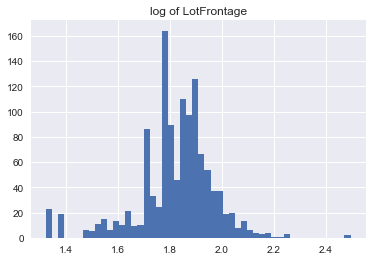

In [260]:
display(train[['LotFrontage']].apply(lambda x: sum(x.isnull())))
plot_histogram(train, 'LotFrontage', bins=50)

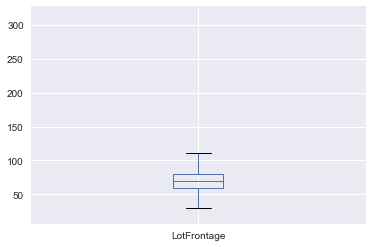

In [261]:
train.boxplot(column='LotFrontage')

R^2 = 0.123763


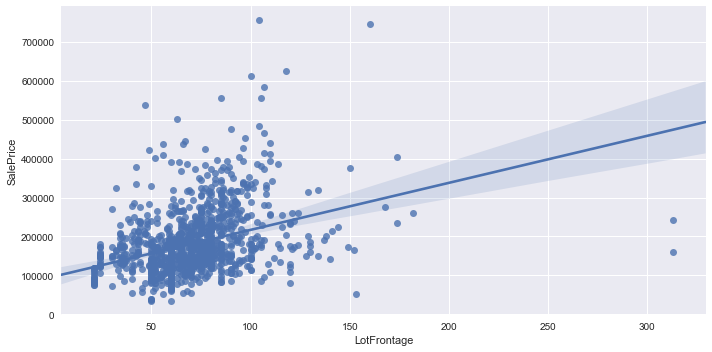

In [262]:
scatter_plot(train, 'LotFrontage', 'SalePrice')

### Analysis

Write analysis here.

## Lot size in square feet

LotArea    0
dtype: int64

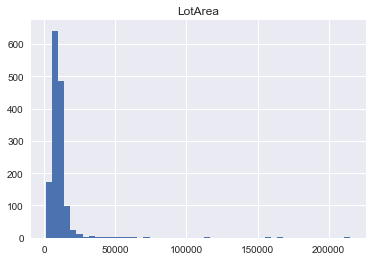

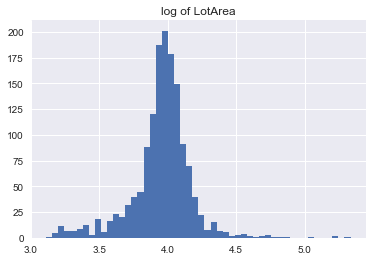

In [263]:
display(train[['LotArea']].apply(lambda x: sum(x.isnull())))
plot_histogram(train, 'LotArea', bins=50)

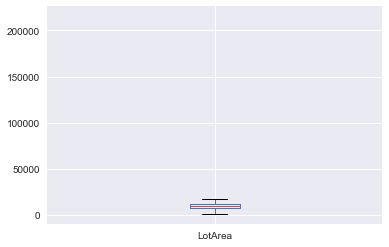

In [264]:
train.boxplot(column='LotArea')

R^2 = 0.069613


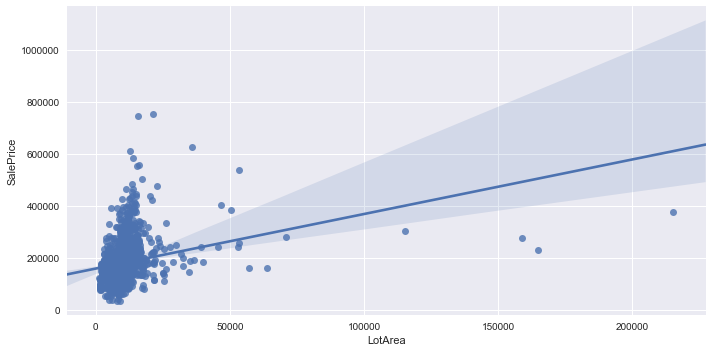

In [265]:
scatter_plot(train, 'LotArea', 'SalePrice')

### Analysis

This is surprising. I expected a stronger linear relationship here. Maybe this feature only matters when combined with others? For example, building class, neighborhood, etc.

## Type of road access

Street    0
dtype: int64

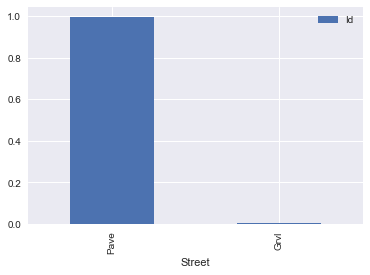

In [266]:
display(train[['Street']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Street')

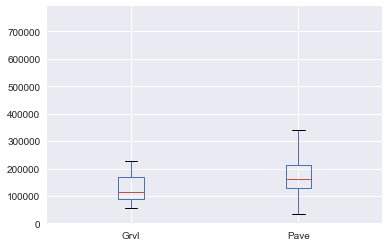

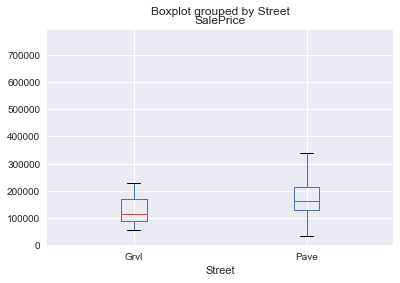

In [267]:
plot_category_correlation(train, 'Street')

### Analysis

Write analysis here.

## Type of alley access

Alley    1369
dtype: int64

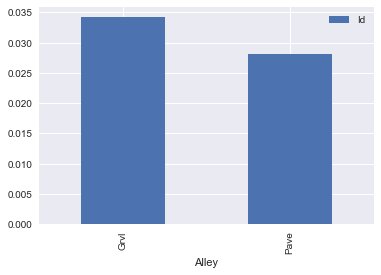

In [268]:
display(train[['Alley']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Alley')

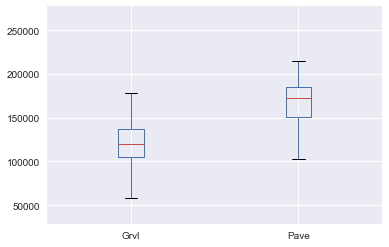

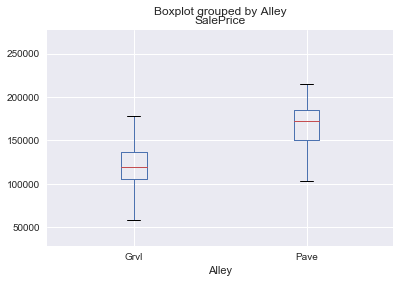

In [269]:
plot_category_correlation(train, 'Alley')

### Analysis

Write analysis here.

## General shape of property

LotShape    0
dtype: int64

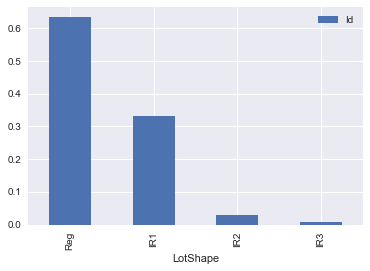

In [270]:
display(train[['LotShape']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'LotShape')

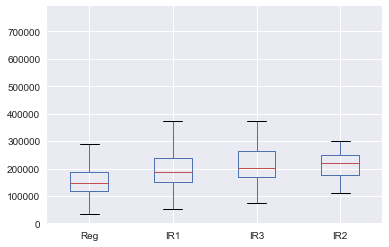

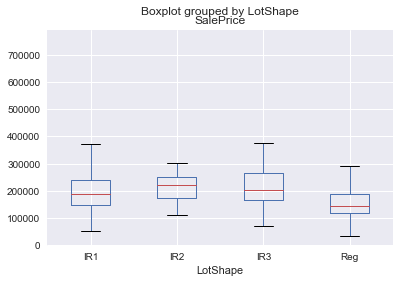

In [271]:
plot_category_correlation(train, 'LotShape')

### Analysis

Write analysis here.

## Flatness of the property

Write hypothesis here, if any.

LandContour    0
dtype: int64

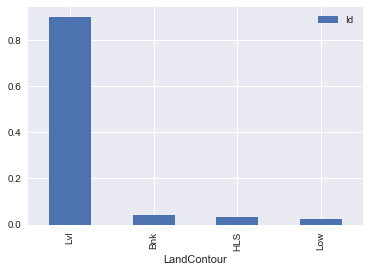

In [272]:
display(train[['LandContour']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'LandContour')

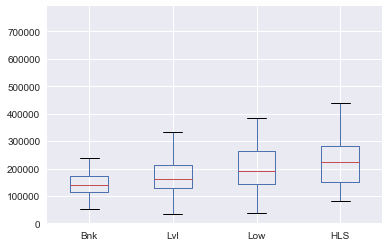

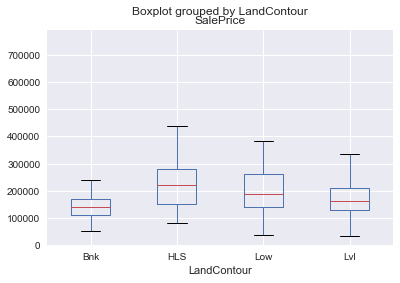

In [273]:
plot_category_correlation(train, 'LandContour')

### Analysis

Write analysis here.

## Type of utilities available

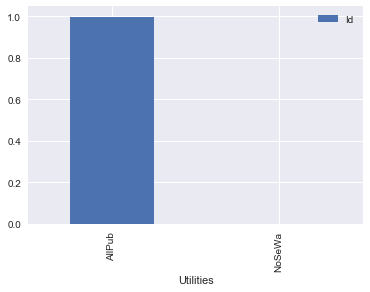

In [274]:
plot_category_distribution(train, 'Utilities')

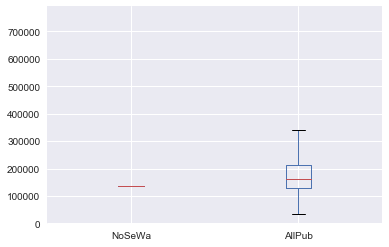

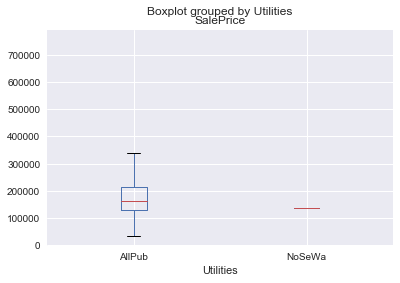

In [275]:
plot_category_correlation(train, 'Utilities')

## Lot configuration

LotConfig    0
dtype: int64

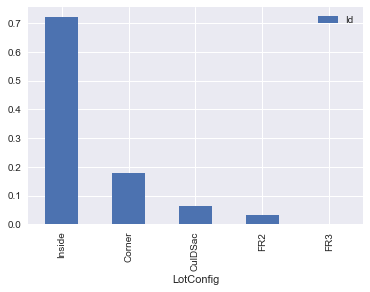

In [276]:
display(train[['LotConfig']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'LotConfig')

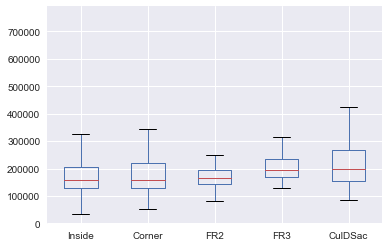

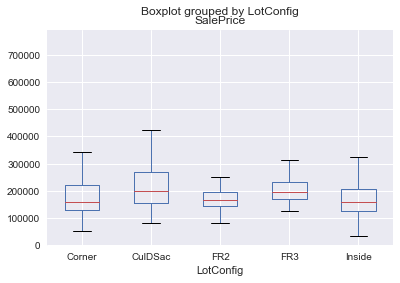

In [277]:
plot_category_correlation(train, 'LotConfig')

## Slope of property

LandSlope    0
dtype: int64

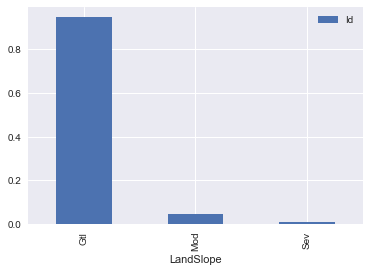

In [278]:
display(train[['LandSlope']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'LandSlope')

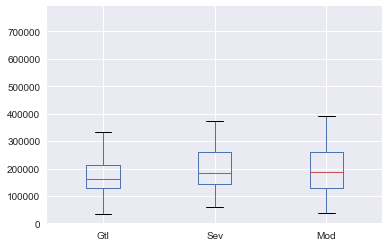

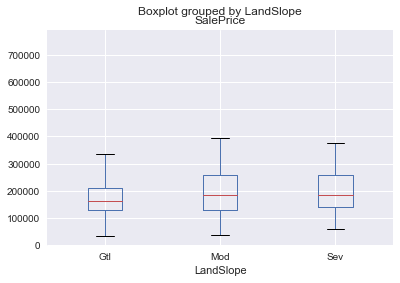

In [279]:
plot_category_correlation(train, 'LandSlope')

## Physical locations within Ames city limits

Neighborhood    0
dtype: int64

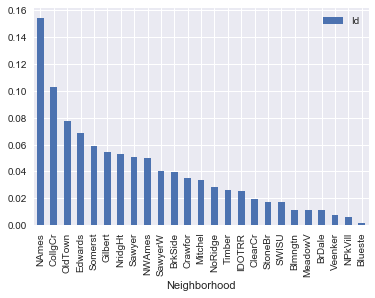

In [280]:
display(train[['Neighborhood']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Neighborhood')

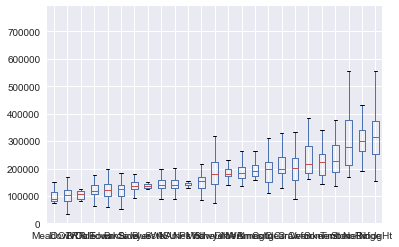

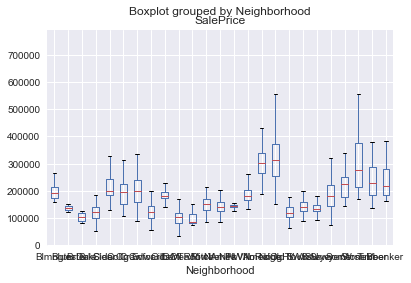

In [281]:
plot_category_correlation(train, 'Neighborhood')

## Proximity to main road or railroad

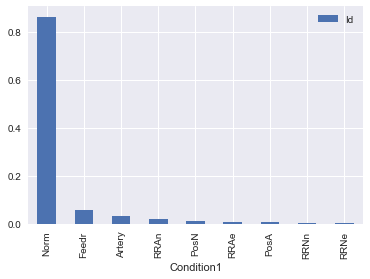

In [282]:
plot_category_distribution(train, 'Condition1')

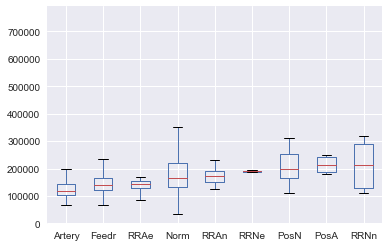

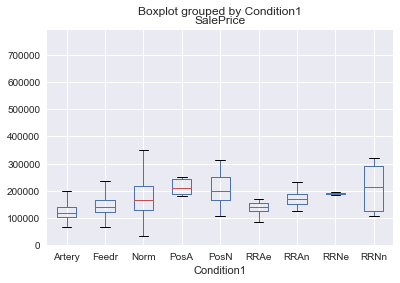

In [283]:
plot_category_correlation(train, 'Condition1')

## Proximity to main road or railroad (if a second is present)

Condition2    0
dtype: int64

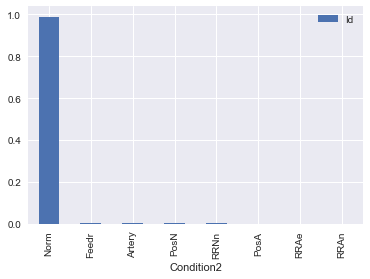

In [284]:
display(train[['Condition2']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Condition2')

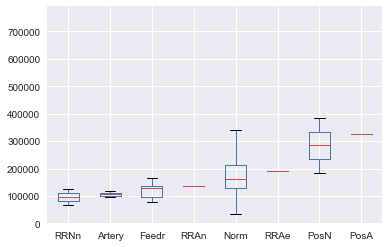

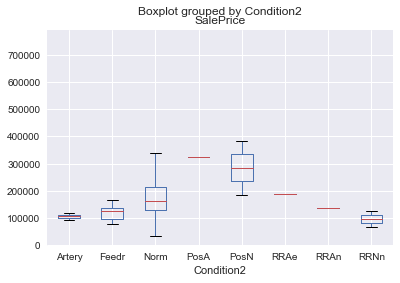

In [285]:
plot_category_correlation(train, 'Condition2')

## Type of dwelling

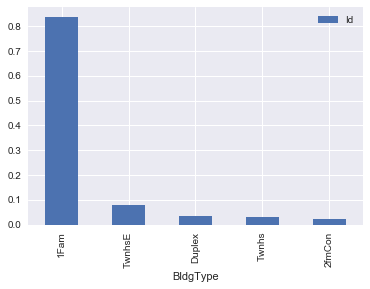

In [286]:
plot_category_distribution(train, 'BldgType')


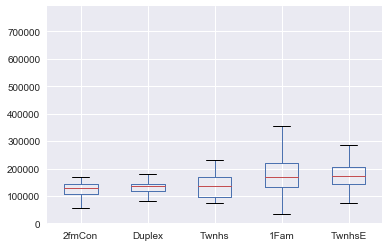

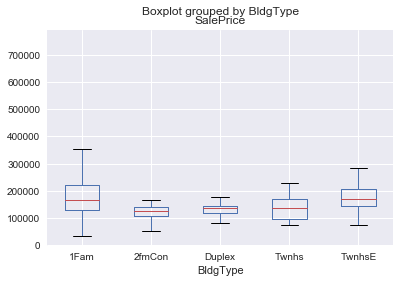

In [287]:
plot_category_correlation(train, 'BldgType')

## Style of dwelling

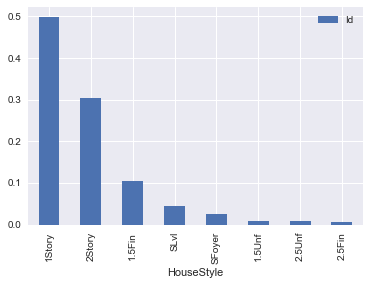

In [288]:
plot_category_distribution(train, 'HouseStyle')

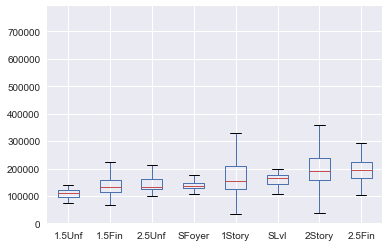

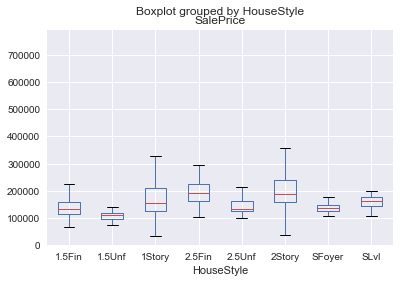

In [289]:
plot_category_correlation(train, 'HouseStyle')

## Overall material and finish quality

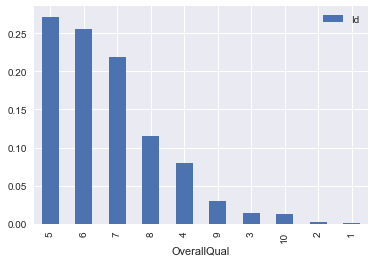

In [290]:
plot_category_distribution(train, 'OverallQual')

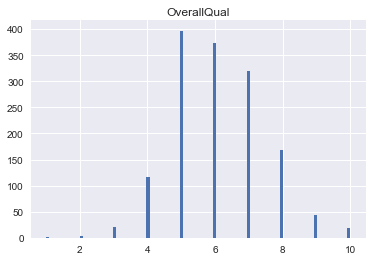

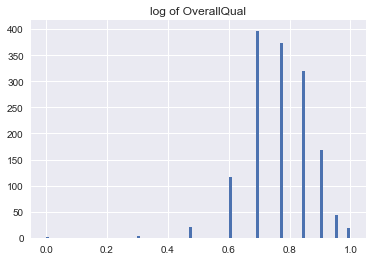

In [291]:
plot_histogram(train, 'OverallQual')

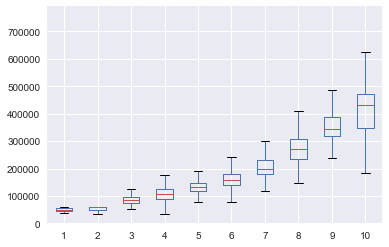

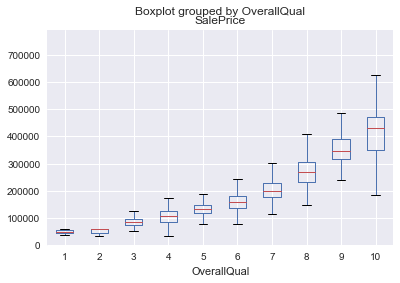

In [292]:
plot_category_correlation(train, 'OverallQual')

## Overall condition rating

Is it correlated with OveralQual?

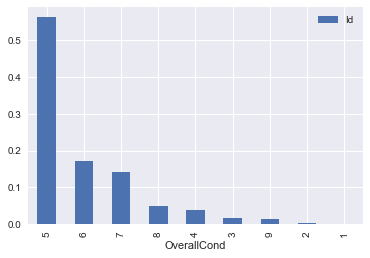

In [293]:
plot_category_distribution(train, 'OverallCond')

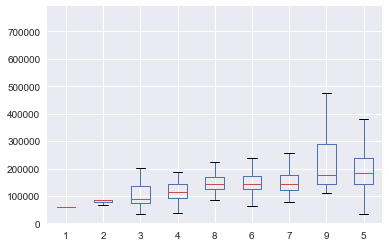

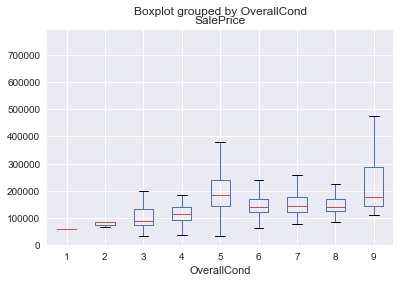

In [294]:
plot_category_correlation(train, 'OverallCond')

## Original construction date

Feature = number of years building had when sold

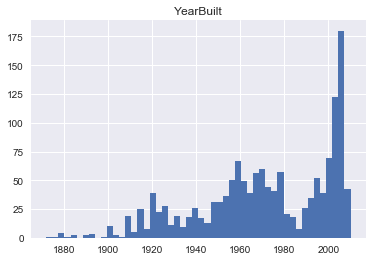

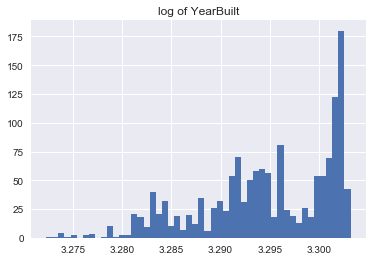

In [295]:
plot_histogram(train, 'YearBuilt', bins=50)

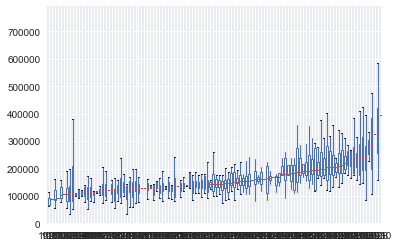

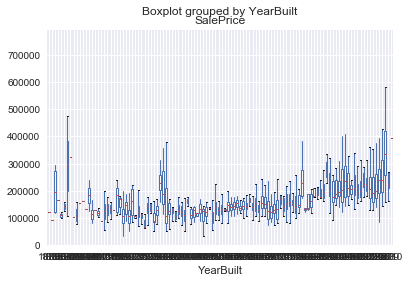

In [296]:
plot_category_correlation(train, 'YearBuilt')

R^2 = 0.273422


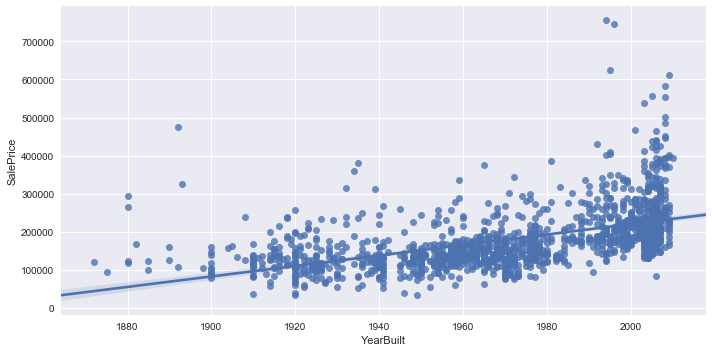

In [297]:
scatter_plot(train, 'YearBuilt', 'SalePrice')

## Remodel date

Feature = number of years after remodel house was sold

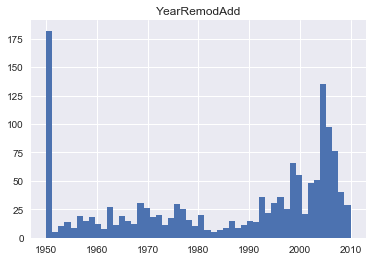

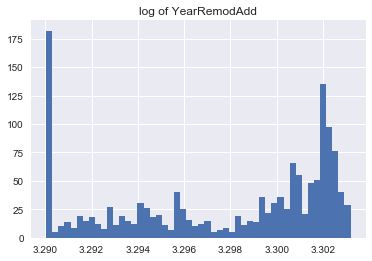

In [298]:
plot_histogram(train, 'YearRemodAdd', bins=50)

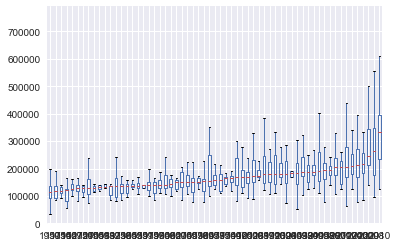

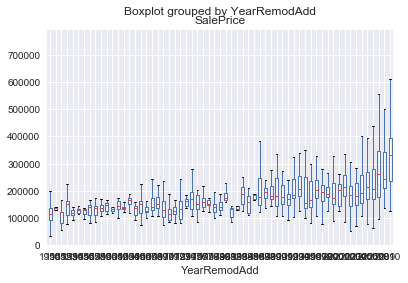

In [299]:
plot_category_correlation(train, 'YearRemodAdd')

R^2 = 0.257151


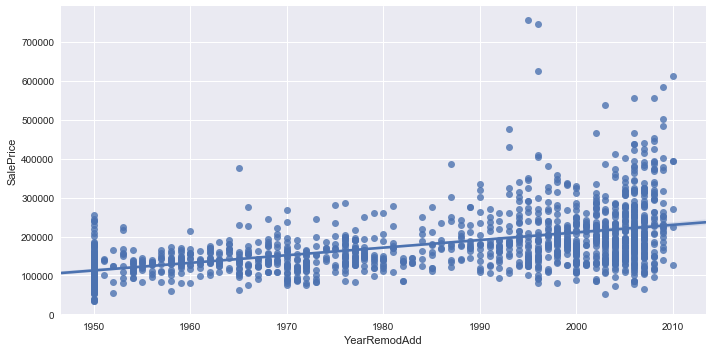

In [300]:
scatter_plot(train, 'YearRemodAdd', 'SalePrice')

## Type of roof

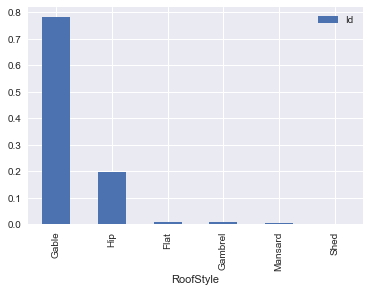

In [301]:
plot_category_distribution(train, 'RoofStyle')

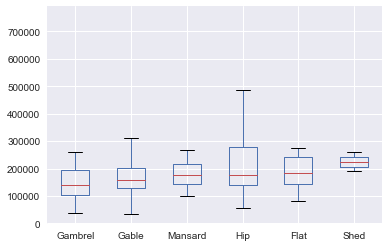

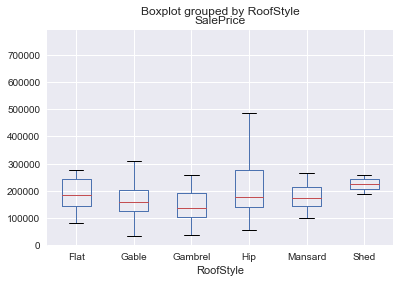

In [302]:
plot_category_correlation(train, 'RoofStyle')

## Roof material

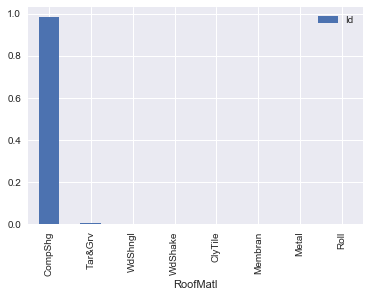

In [303]:
plot_category_distribution(train, 'RoofMatl')


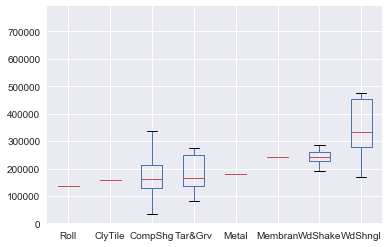

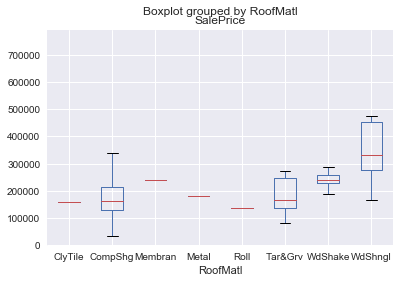

In [304]:
plot_category_correlation(train, 'RoofMatl')

## Exterior covering on house

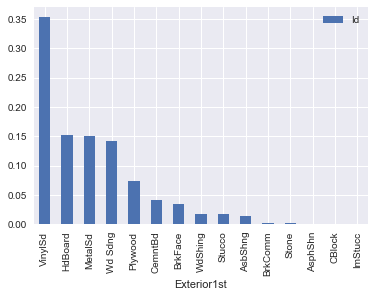

In [305]:
plot_category_distribution(train, 'Exterior1st')


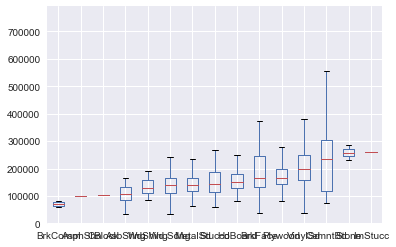

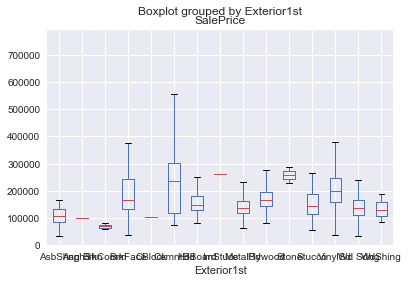

In [306]:
plot_category_correlation(train, 'Exterior1st')


## Exterior covering on house (if more than one material)


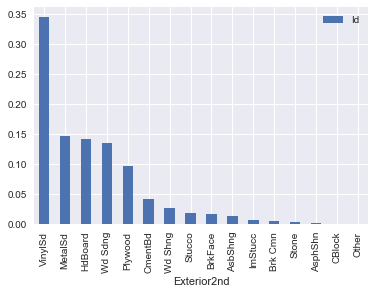

In [307]:
plot_category_distribution(train, 'Exterior2nd')


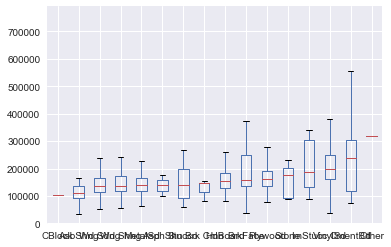

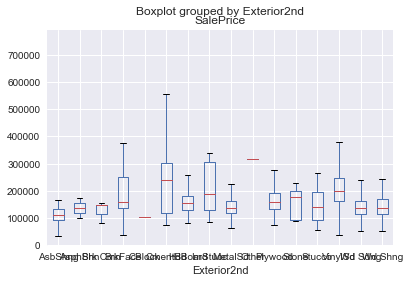

In [308]:
plot_category_correlation(train, 'Exterior2nd')


## Masonry veneer type

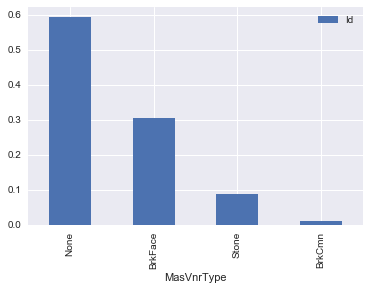

In [309]:
plot_category_distribution(train, 'MasVnrType')

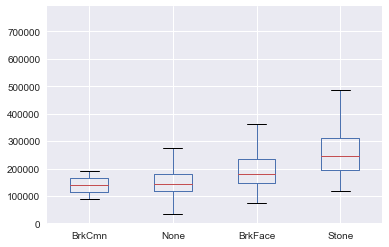

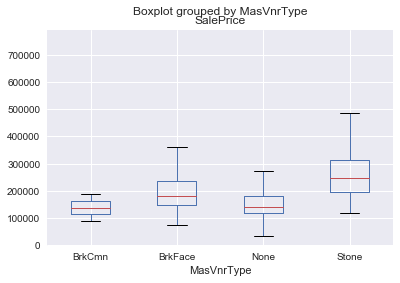

In [310]:
plot_category_correlation(train, 'MasVnrType')

## Masonry veneer area in square feet

Join this with previous feature somehow? Drop zeroes before analyzing?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


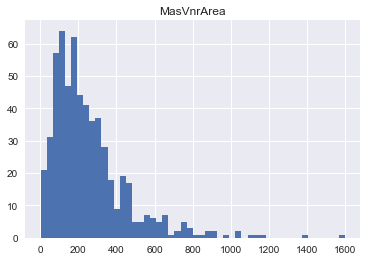

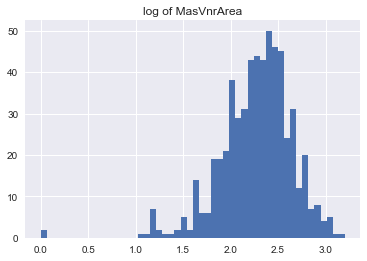

In [311]:
plot_histogram(train[train['MasVnrArea'] > 0], 'MasVnrArea', bins=50)

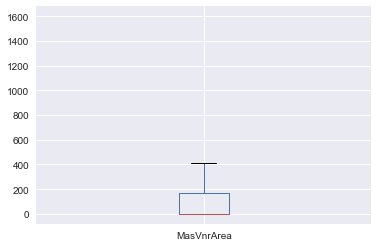

In [312]:
train.boxplot(column='MasVnrArea')

R^2 = 0.228000


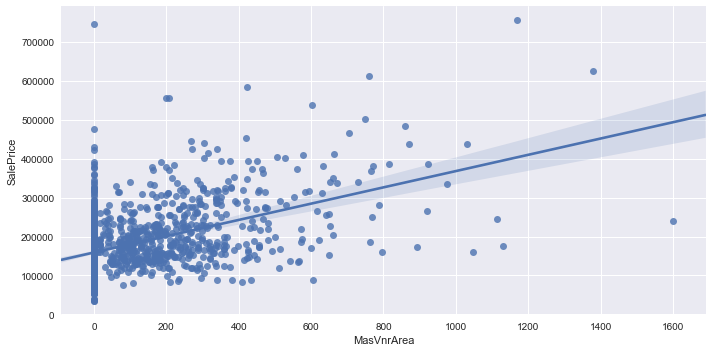

In [313]:
scatter_plot(train, 'MasVnrArea', 'SalePrice')

## HasMasonry

This is a new feature

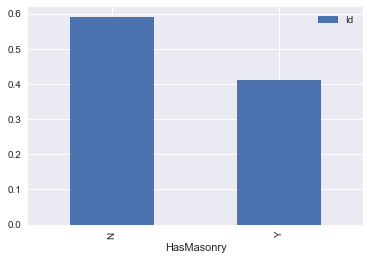

In [471]:
train['HasMasonry'] = train['MasVnrArea'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasMasonry')

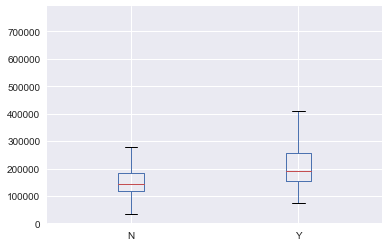

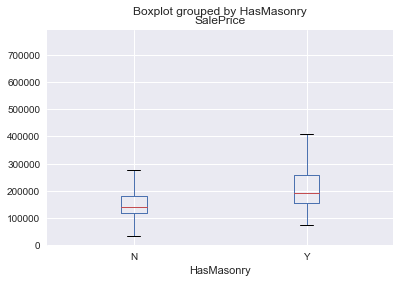

In [472]:
plot_category_correlation(train, 'HasMasonry')


## Exterior material quality

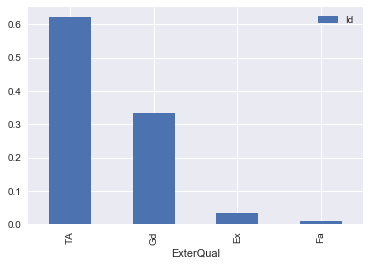

In [314]:
plot_category_distribution(train, 'ExterQual')

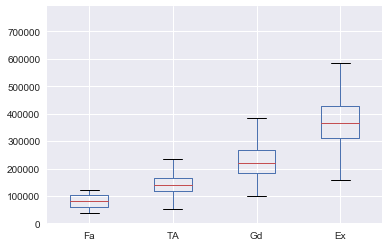

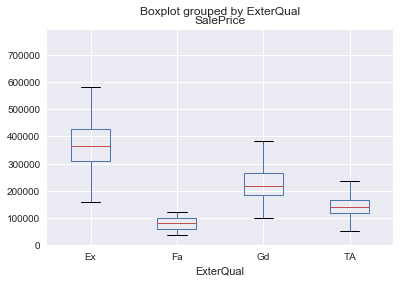

In [315]:
plot_category_correlation(train, 'ExterQual')


## Present condition of the material on the exterior

Join with previous feature somehow? Maybe conditions matters more for better materials.

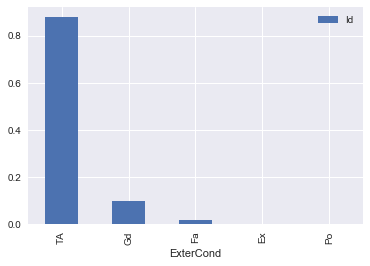

In [316]:
plot_category_distribution(train, 'ExterCond')

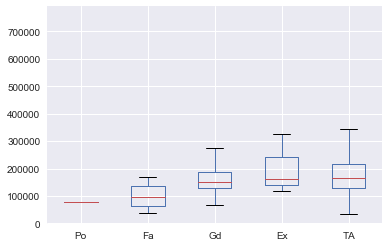

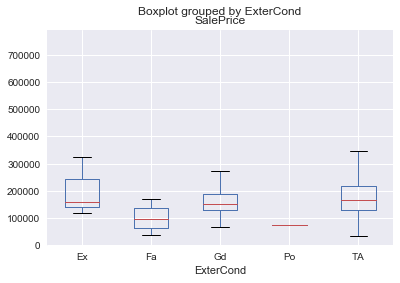

In [317]:
plot_category_correlation(train, 'ExterCond')

## Type of foundation

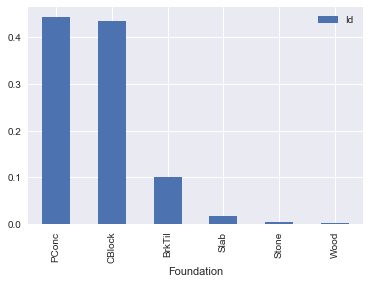

In [318]:
plot_category_distribution(train, 'Foundation')


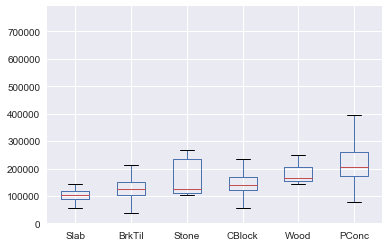

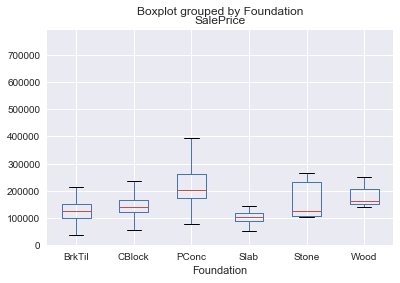

In [319]:
plot_category_correlation(train, 'Foundation')


## Height of the basement

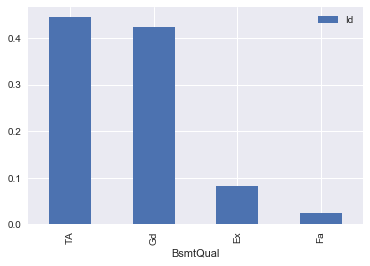

In [320]:
plot_category_distribution(train, 'BsmtQual')

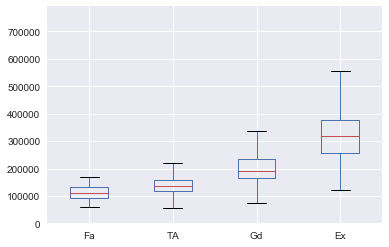

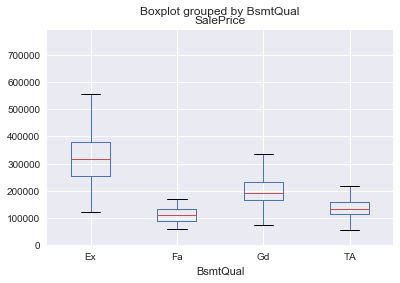

In [321]:
plot_category_correlation(train, 'BsmtQual')

## General condition of the basement

Combine with previous feature?

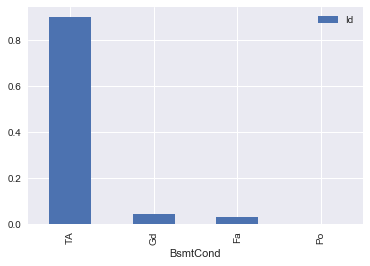

In [322]:
plot_category_distribution(train, 'BsmtCond')

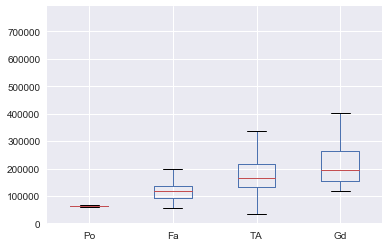

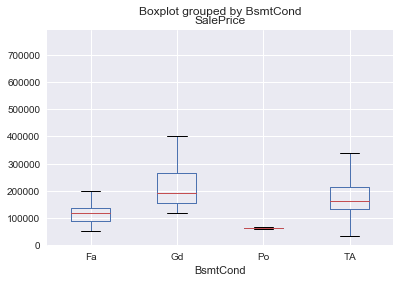

In [323]:
plot_category_correlation(train, 'BsmtCond')


## Walkout or garden level basement walls

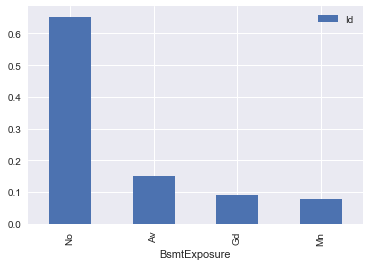

In [324]:
plot_category_distribution(train, 'BsmtExposure')


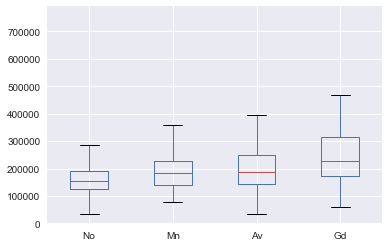

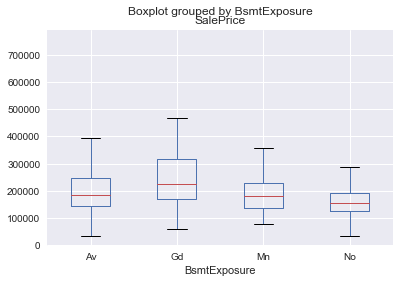

In [325]:
plot_category_correlation(train, 'BsmtExposure')


## Quality of basement finished area

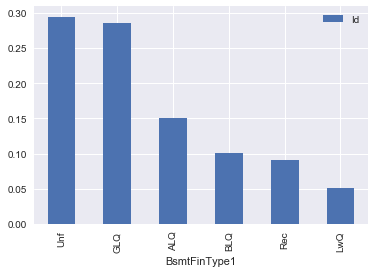

In [326]:
plot_category_distribution(train, 'BsmtFinType1')


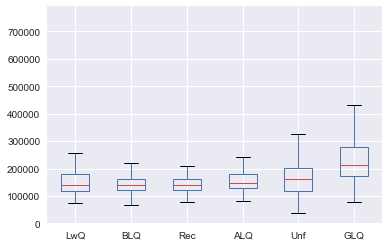

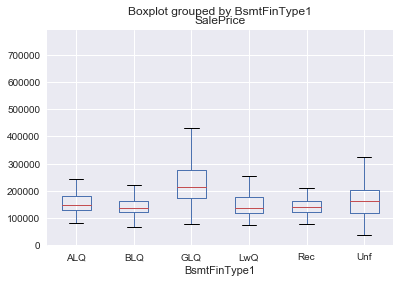

In [327]:
plot_category_correlation(train, 'BsmtFinType1')


## Type 1 finished square feet

Turn into binary variable, has or has not fintype2?

BsmtFinType2    38
dtype: int64

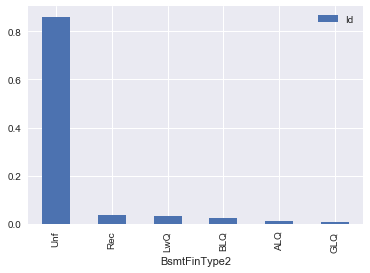

In [328]:
display(train[['BsmtFinType2']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'BsmtFinType2')


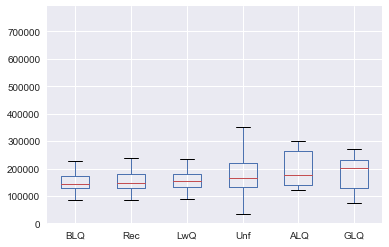

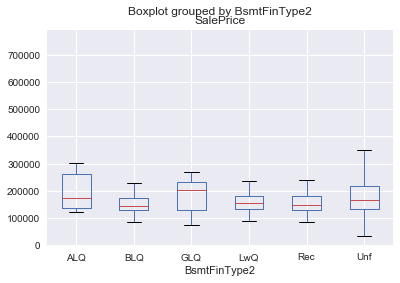

In [329]:
plot_category_correlation(train, 'BsmtFinType2')

## Type 2 finished square feet

Remove zeros before analyzing

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


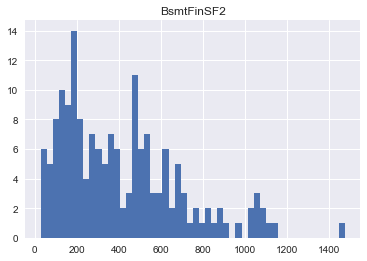

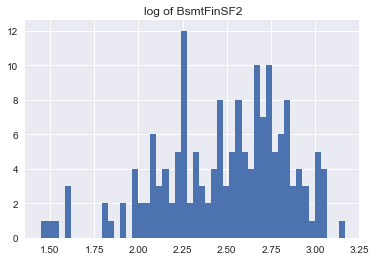

In [330]:
plot_histogram(train[train['BsmtFinSF2'] > 0], 'BsmtFinSF2', bins=50)

R^2 = 0.000129


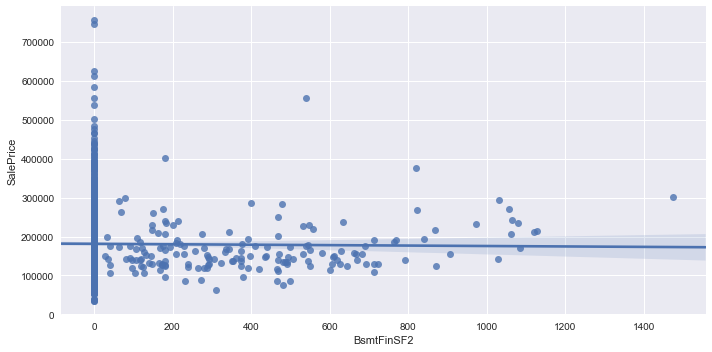

In [331]:
scatter_plot(train, 'BsmtFinSF2', 'SalePrice')

## HasType2

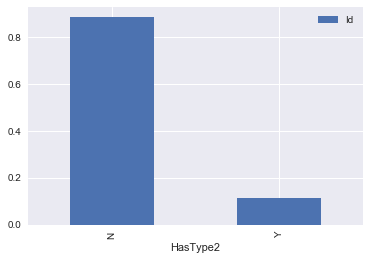

In [469]:
train['HasType2'] = train['BsmtFinSF2'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasType2')

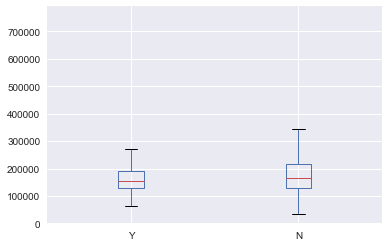

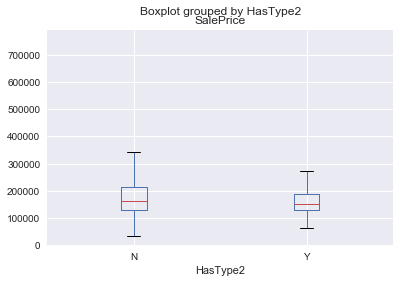

In [470]:
plot_category_correlation(train, 'HasType2')

## Unfinished square feet of basement area

Remove zeros before analyzing

R^2 = 0.046001


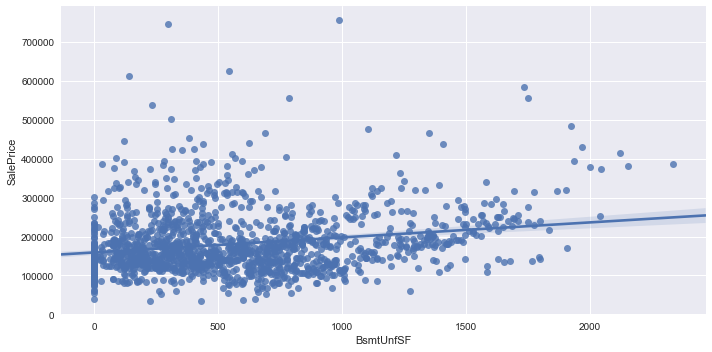

In [332]:
scatter_plot(train, 'BsmtUnfSF', 'SalePrice')

## HasUnfinishedBasement

This is a new feature

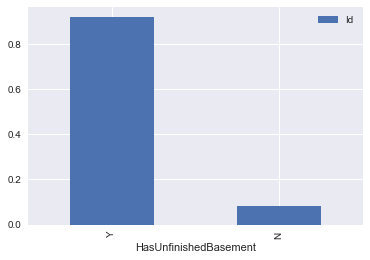

In [467]:
train['HasUnfinishedBasement'] = train['BsmtUnfSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasUnfinishedBasement')

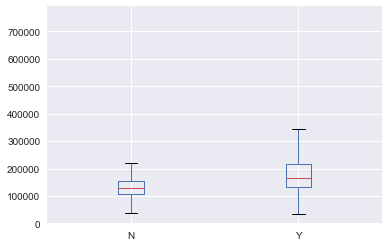

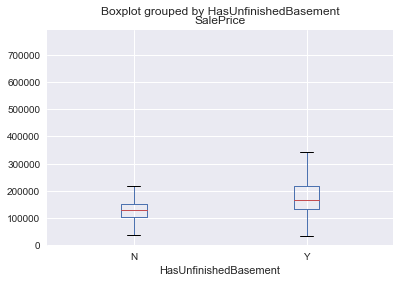

In [468]:
plot_category_correlation(train, 'HasUnfinishedBasement')

## Total square feet of basement area

Feature for total square feet of housing

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


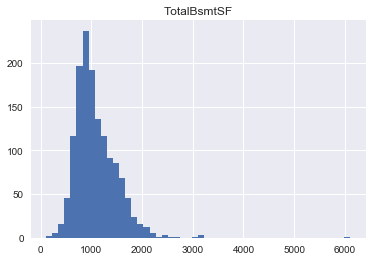

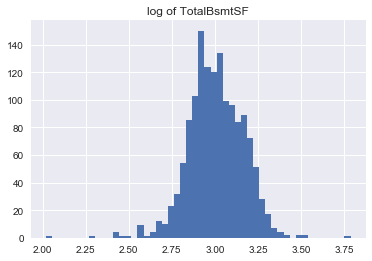

In [333]:
plot_histogram(train[train['TotalBsmtSF'] > 0], 'TotalBsmtSF', bins=50)

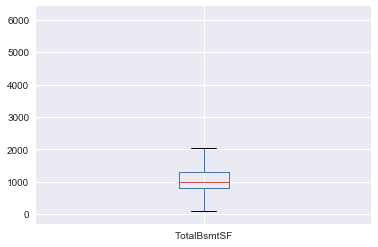

In [334]:
train.boxplot(column='TotalBsmtSF')


R^2 = 0.376481


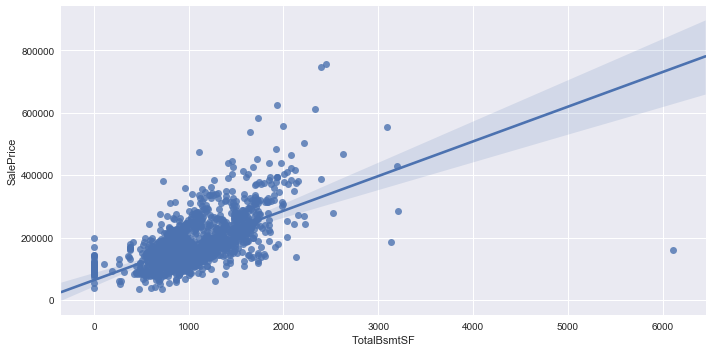

In [335]:
scatter_plot(train, 'TotalBsmtSF', 'SalePrice')

## Type of heating

Handle case of no heating. Maybe it's a better feature (binary, has or not). Same for similar variables.

Heating    0
dtype: int64

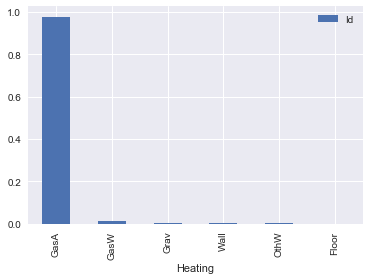

In [336]:
display(train[['Heating']].apply(lambda x: sum(x.isnull())))
plot_category_distribution(train, 'Heating')

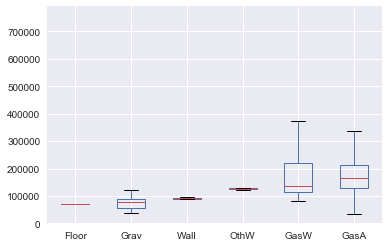

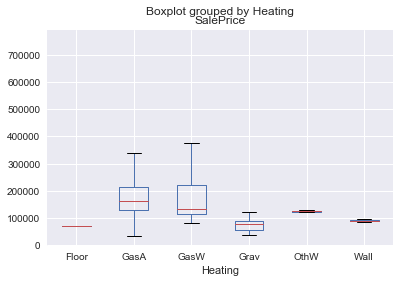

In [337]:
plot_category_correlation(train, 'Heating')

## Heating quality and condition

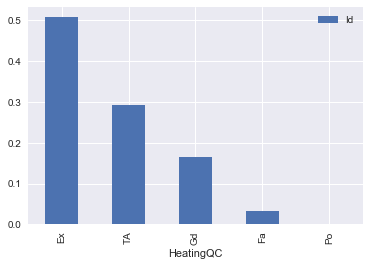

In [338]:
plot_category_distribution(train, 'HeatingQC')


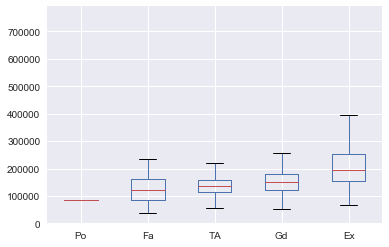

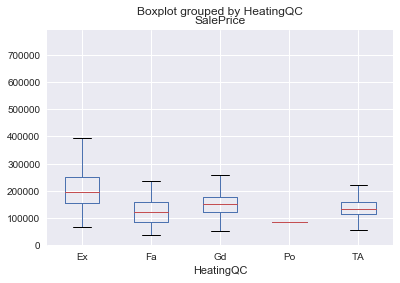

In [339]:
plot_category_correlation(train, 'HeatingQC')


## Central air conditioning

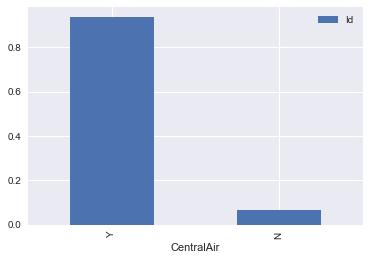

In [340]:
plot_category_distribution(train, 'CentralAir')


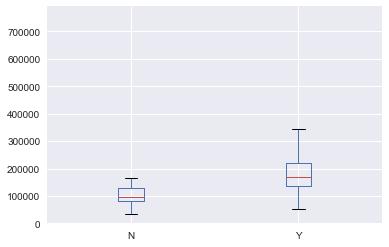

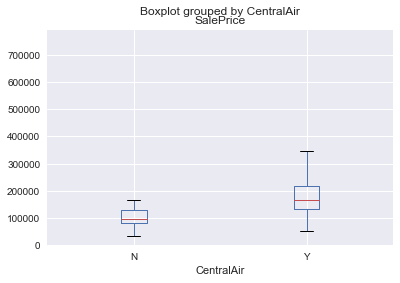

In [341]:
plot_category_correlation(train, 'CentralAir')

## Electrical system

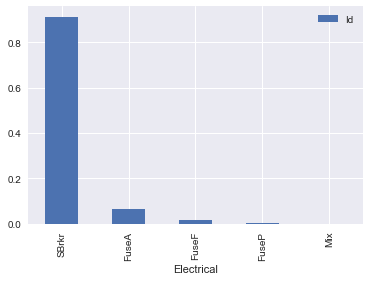

In [342]:
plot_category_distribution(train, 'Electrical')


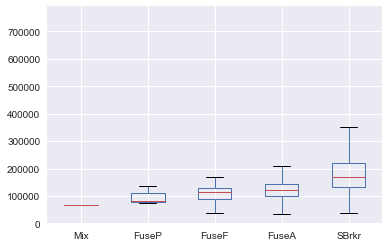

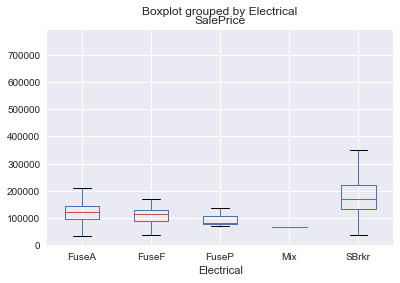

In [343]:
plot_category_correlation(train, 'Electrical')

## First Floor square feet

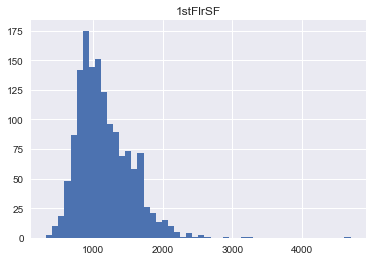

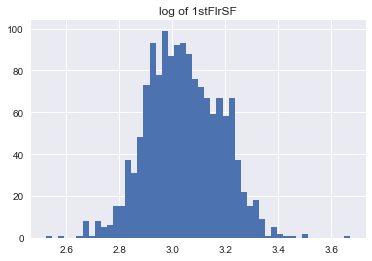

In [344]:
plot_histogram(train, '1stFlrSF', bins=50)

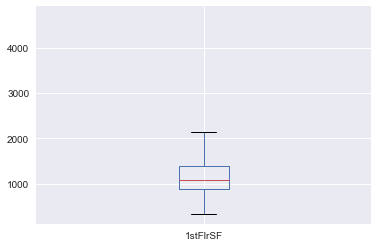

In [345]:
train.boxplot(column='1stFlrSF')

R^2 = 0.367057


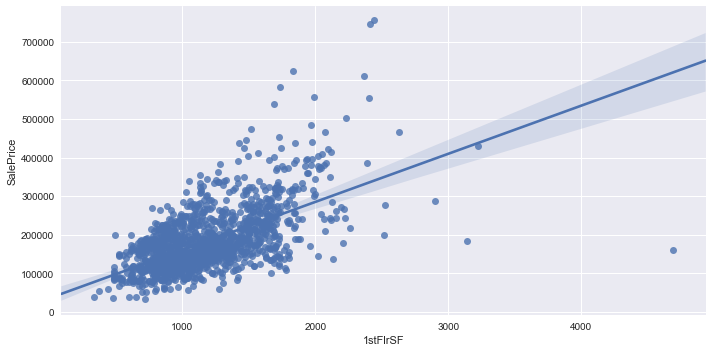

In [346]:
scatter_plot(train, '1stFlrSF', 'SalePrice')

### Analysis

Create feature for total area, if it does not exist

## Second floor square feet

Create feature for has or does not have second floor

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


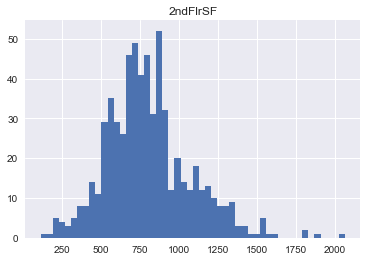

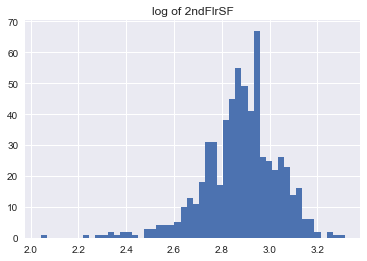

In [347]:
plot_histogram(train[train['2ndFlrSF'] > 0], '2ndFlrSF', bins=50)

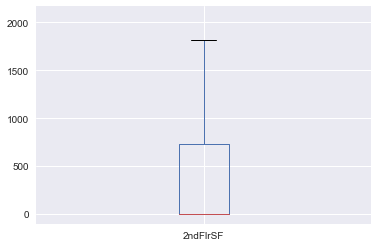

In [348]:
train.boxplot(column='2ndFlrSF')


R^2 = 0.101974


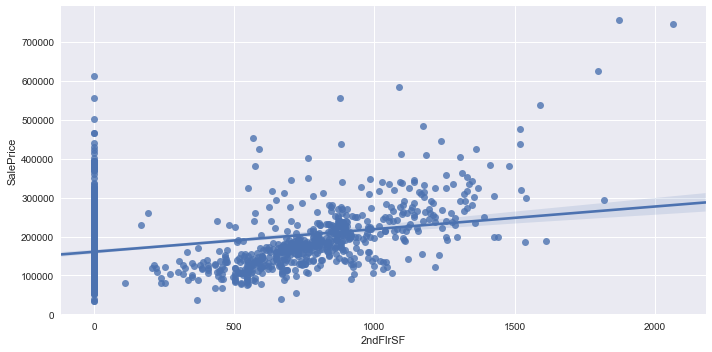

In [349]:
scatter_plot(train, '2ndFlrSF', 'SalePrice')

R^2 = 0.453339


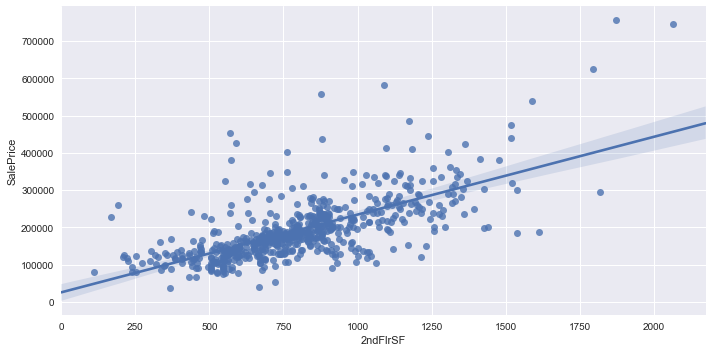

In [350]:
scatter_plot(train[train['2ndFlrSF'] > 0], '2ndFlrSF', 'SalePrice')

## HasSecondFloor

This is a new feature

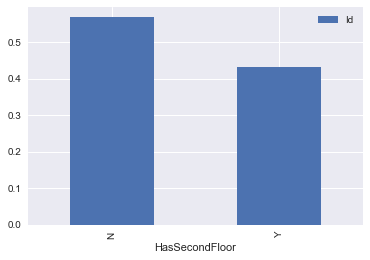

In [459]:
train['HasSecondFloor'] = train['2ndFlrSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasSecondFloor')

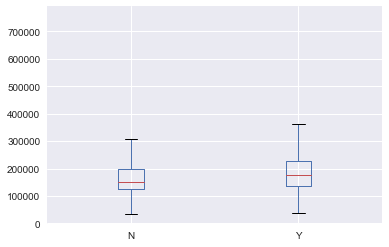

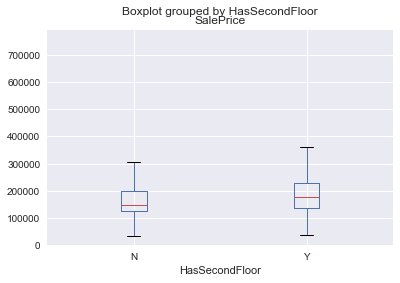

In [460]:
plot_category_correlation(train, 'HasSecondFloor')


## DuplexArea

This is a new feature

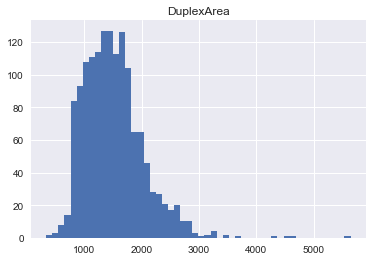

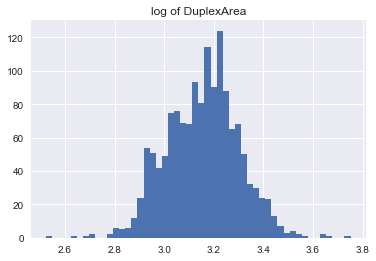

In [462]:
train['DuplexArea'] = train['1stFlrSF'] + train['2ndFlrSF']
plot_histogram(train, 'DuplexArea', bins=50)

R^2 = 0.513921


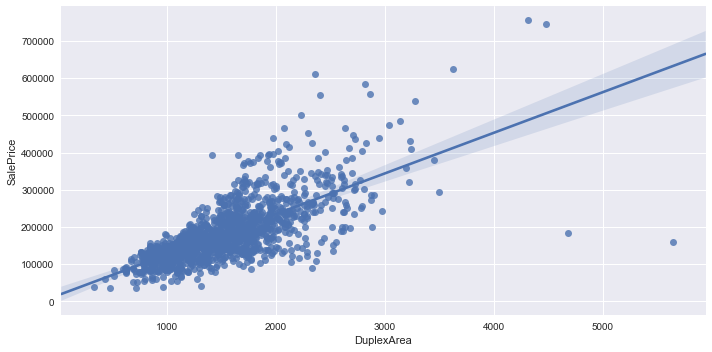

In [463]:
scatter_plot(train, 'DuplexArea', 'SalePrice')

## TriplexArea

This is a new feature

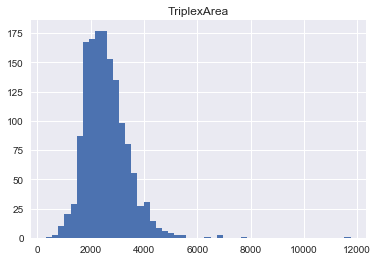

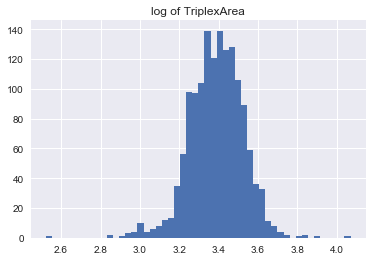

In [465]:
train['TriplexArea'] = train['DuplexArea'] + train['TotalBsmtSF']
plot_histogram(train, 'TriplexArea', bins=50)

R^2 = 0.611931


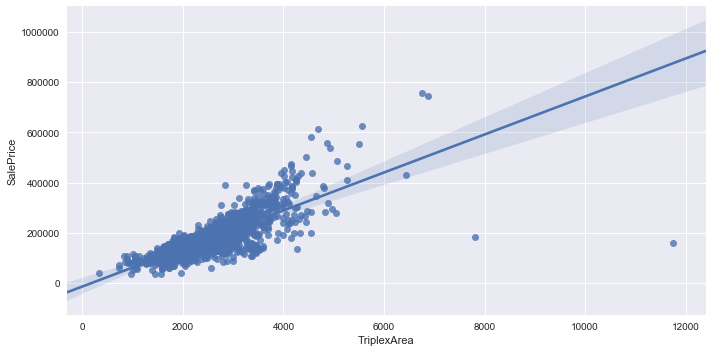

In [466]:
scatter_plot(train, 'TriplexArea', 'SalePrice')

## Low quality finished square feet (all floors)

Turn into binary variable?

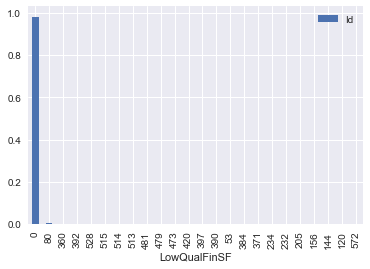

In [351]:
plot_category_distribution(train, 'LowQualFinSF')


## HasLowQualityFinishing

This is a new feature

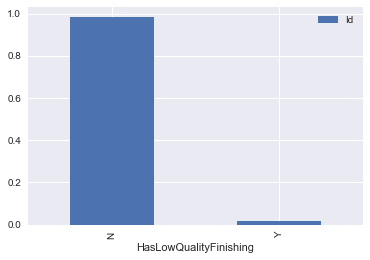

In [457]:
train['HasLowQualityFinishing'] = train['LowQualFinSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasLowQualityFinishing')

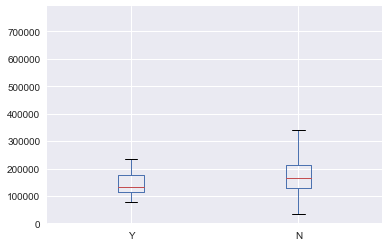

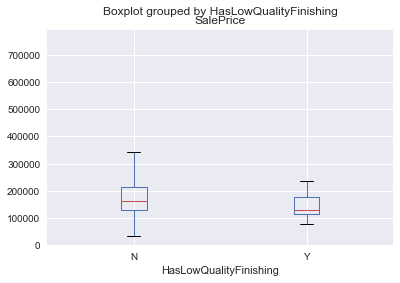

In [458]:
plot_category_correlation(train, 'HasLowQualityFinishing')


## Above grade (ground) living area square feet

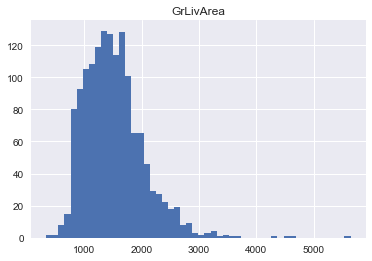

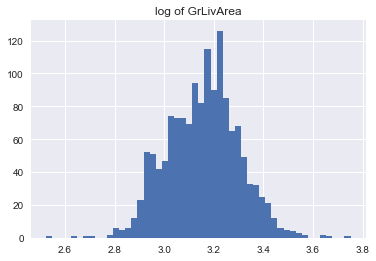

In [352]:
plot_histogram(train, 'GrLivArea', bins=50)

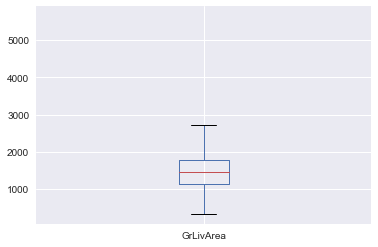

In [353]:
train.boxplot(column='GrLivArea')


R^2 = 0.502149


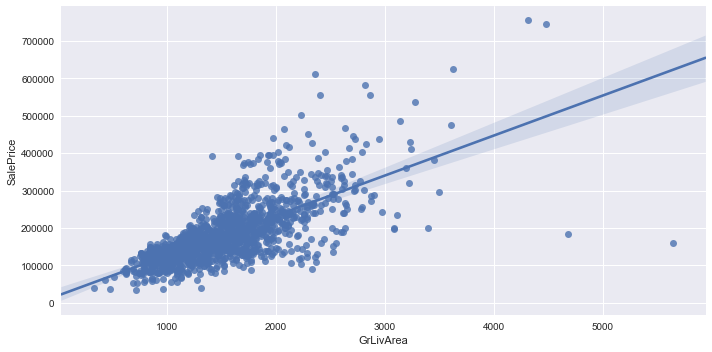

In [354]:
scatter_plot(train, 'GrLivArea', 'SalePrice')

## Basement full bathrooms

Turn into binary variable?

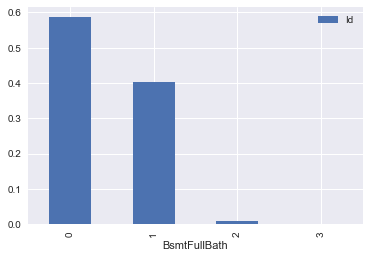

In [355]:
plot_category_distribution(train, 'BsmtFullBath')


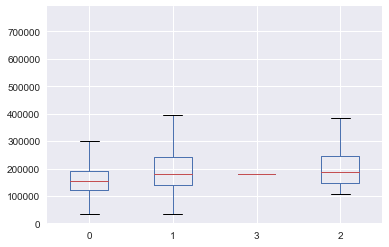

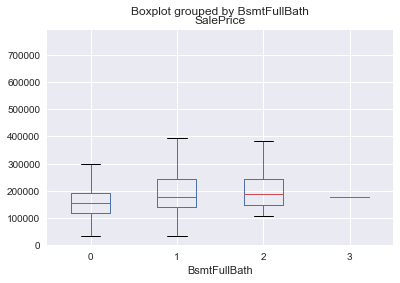

In [356]:
plot_category_correlation(train, 'BsmtFullBath')


## Basement half bathrooms

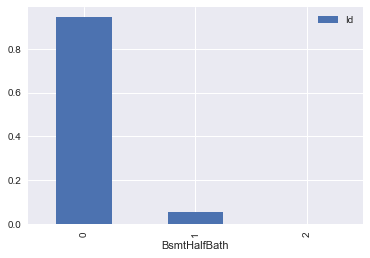

In [357]:
plot_category_distribution(train, 'BsmtHalfBath')


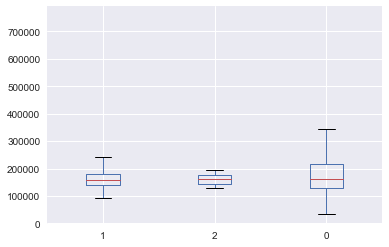

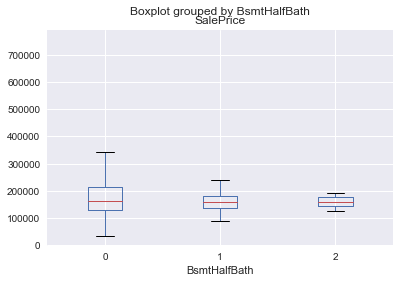

In [358]:
plot_category_correlation(train, 'BsmtHalfBath')


## Full bathrooms above grade

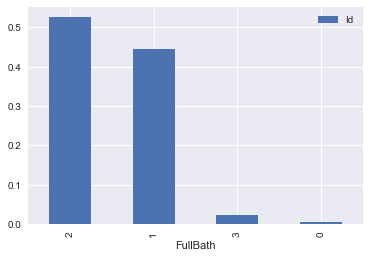

In [359]:
plot_category_distribution(train, 'FullBath')


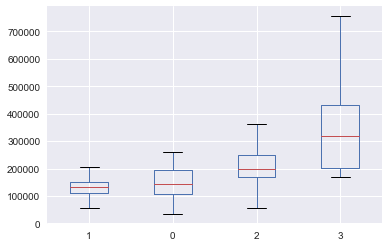

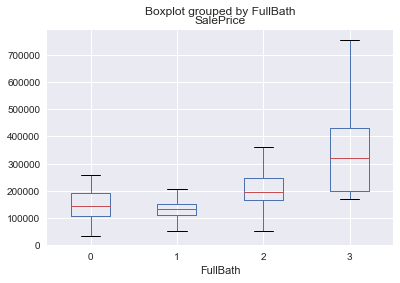

In [360]:
plot_category_correlation(train, 'FullBath')


## HasFullBathAboveGrade

This is a new feature

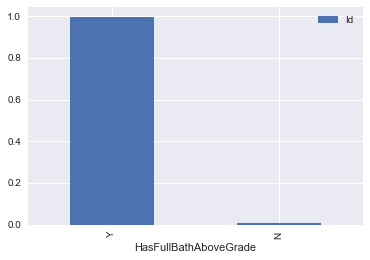

In [454]:
train['HasFullBathAboveGrade'] = train['FullBath'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasFullBathAboveGrade')

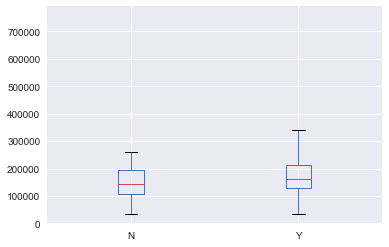

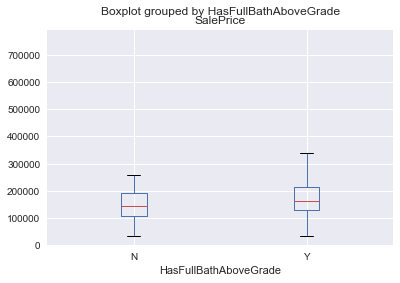

In [455]:
plot_category_correlation(train, 'HasFullBathAboveGrade')


## Half baths above grade

Feature for total number of bathrooms (full and half)?

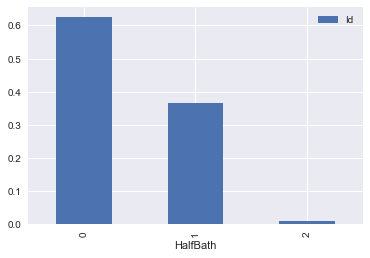

In [361]:
plot_category_distribution(train, 'HalfBath')


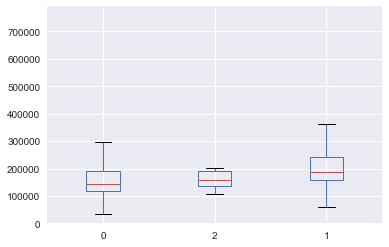

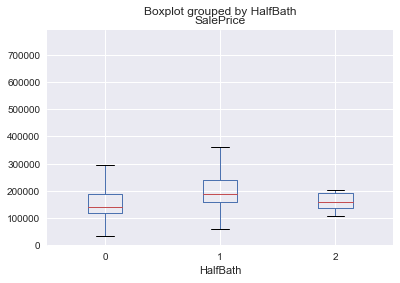

In [362]:
plot_category_correlation(train, 'HalfBath')


## HasHalfBathAboveGrade

This is a new feature


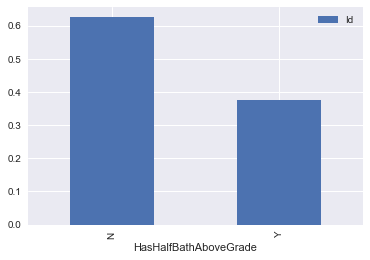

In [452]:
train['HasHalfBathAboveGrade'] = train['HalfBath'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasHalfBathAboveGrade')

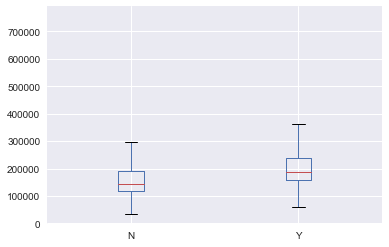

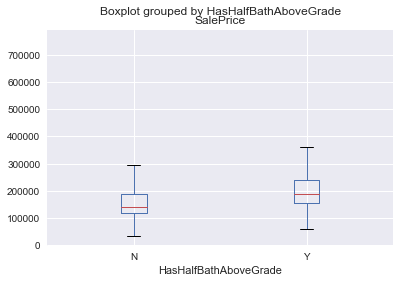

In [453]:
plot_category_correlation(train, 'HasHalfBathAboveGrade')


## TotalBathAboveGrade

This is a new feature

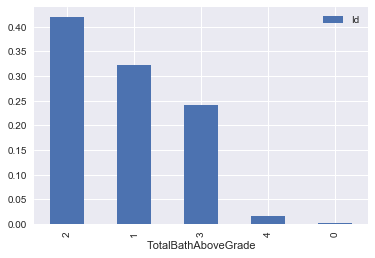

In [448]:
train['TotalBathAboveGrade'] = train['FullBath'] + train['HalfBath']
plot_category_distribution(train, 'TotalBathAboveGrade')


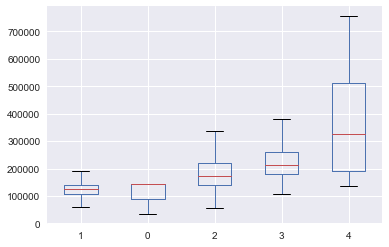

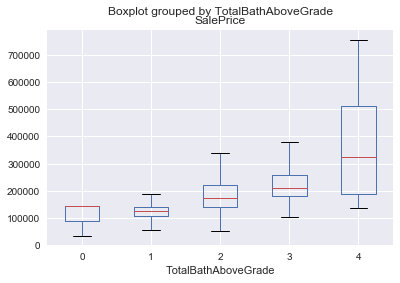

In [449]:
plot_category_correlation(train, 'TotalBathAboveGrade')


## HasBathAboveGrade

This is a new feature

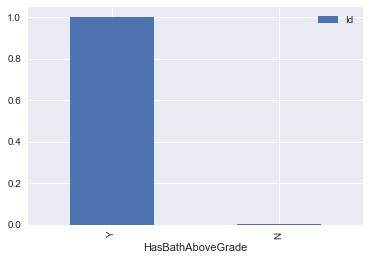

In [450]:
train['HasBathAboveGrade'] = train['TotalBathAboveGrade'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasBathAboveGrade')

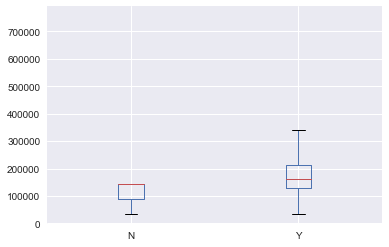

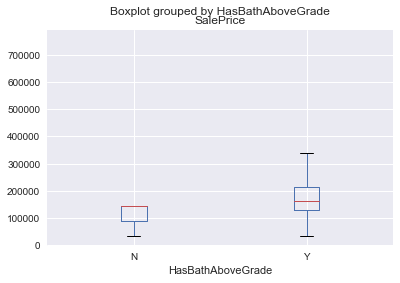

In [451]:
plot_category_correlation(train, 'HasBathAboveGrade')


## Number of bedrooms above basement level

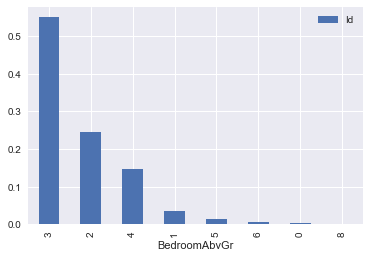

In [363]:
plot_category_distribution(train, 'BedroomAbvGr')


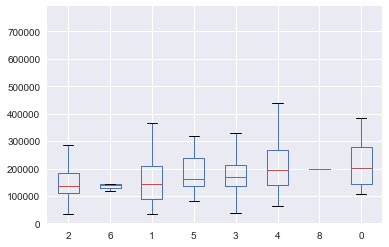

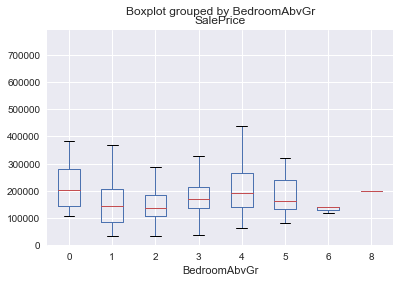

In [364]:
plot_category_correlation(train, 'BedroomAbvGr')


## Number of kitchens

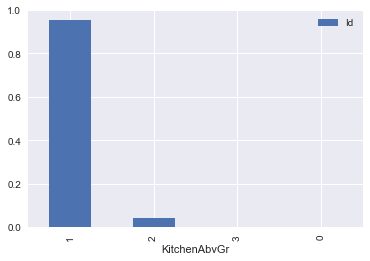

In [365]:
plot_category_distribution(train, 'KitchenAbvGr')


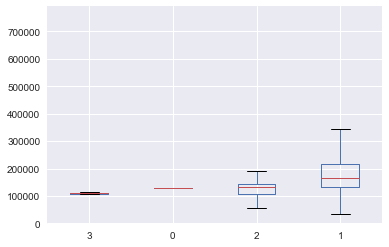

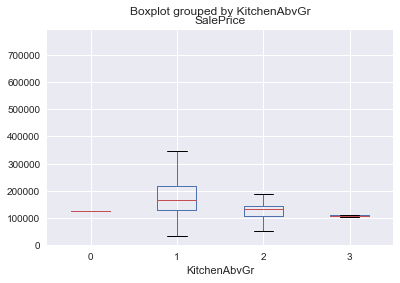

In [366]:
plot_category_correlation(train, 'KitchenAbvGr')


## Kitchen quality

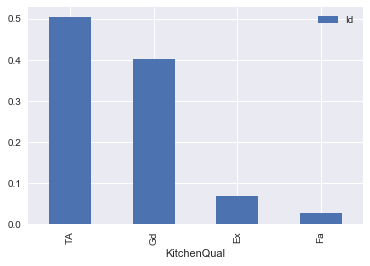

In [367]:
plot_category_distribution(train, 'KitchenQual')


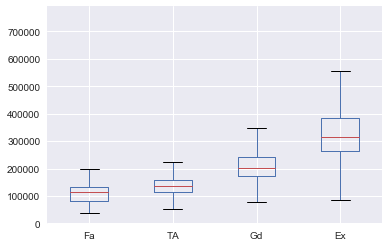

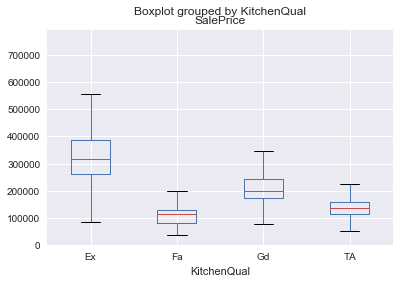

In [368]:
plot_category_correlation(train, 'KitchenQual')


## Total rooms above grade (does not include bathrooms)

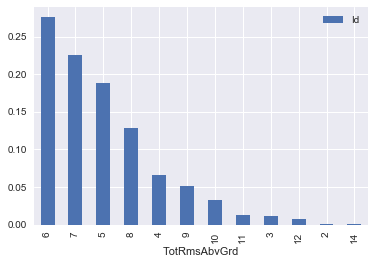

In [369]:
plot_category_distribution(train, 'TotRmsAbvGrd')


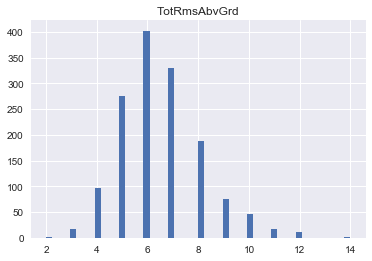

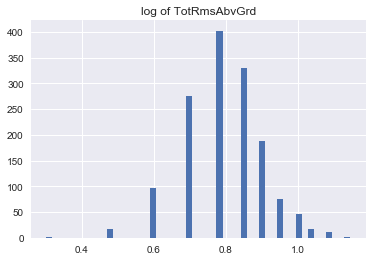

In [370]:
plot_histogram(train, 'TotRmsAbvGrd', bins=50)


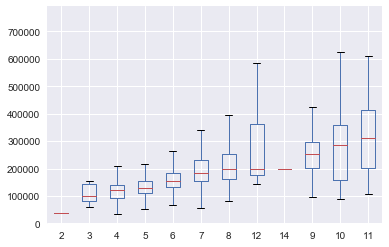

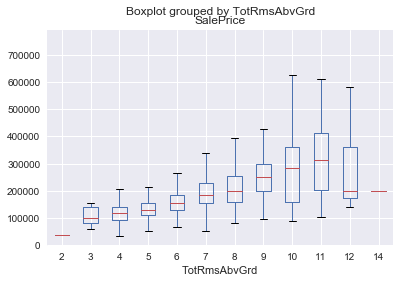

In [371]:
plot_category_correlation(train, 'TotRmsAbvGrd')


## Home functionality rating

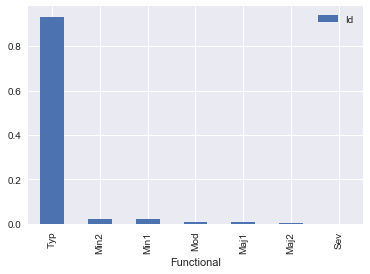

In [372]:
plot_category_distribution(train, 'Functional')


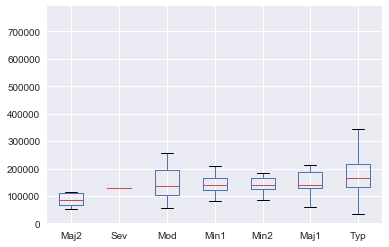

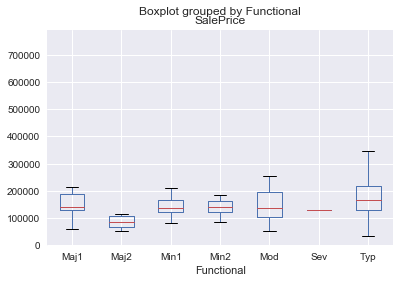

In [373]:
plot_category_correlation(train, 'Functional')


## Number of fireplaces

Turn into binary feature?

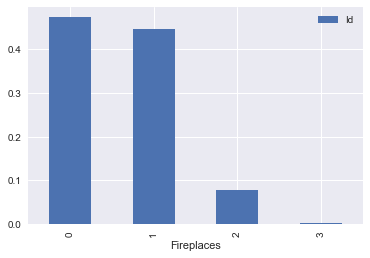

In [374]:
plot_category_distribution(train, 'Fireplaces')


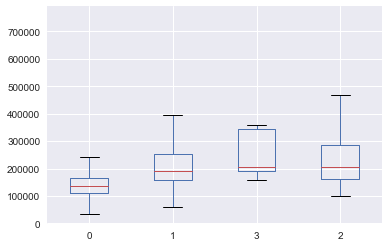

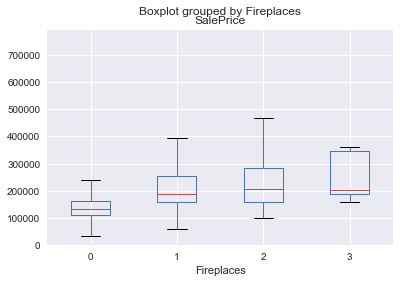

In [375]:
plot_category_correlation(train, 'Fireplaces')


## Fireplace quality

Add "no fireplace"

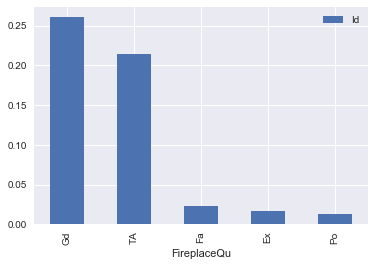

In [376]:
plot_category_distribution(train, 'FireplaceQu')


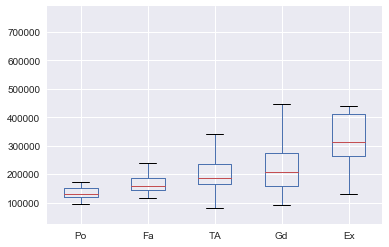

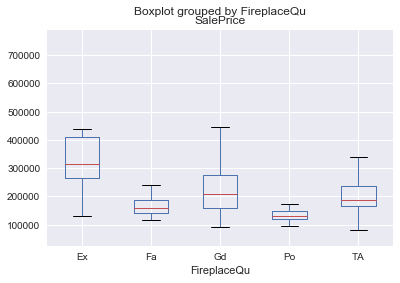

In [377]:
plot_category_correlation(train, 'FireplaceQu')


## HasFireplace

This is a new feature

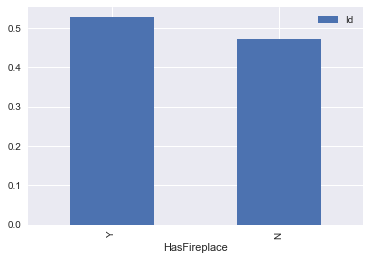

In [445]:
train['HasFireplace'] = train['Fireplaces'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasFireplace')

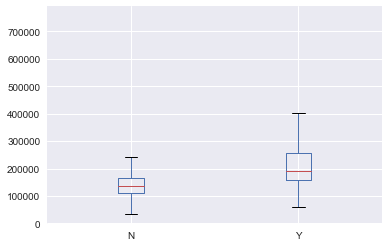

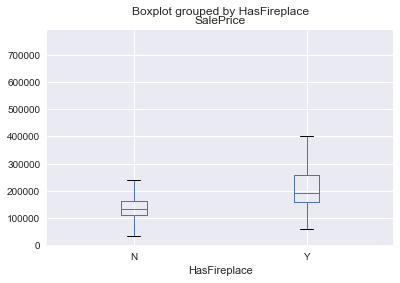

In [446]:
plot_category_correlation(train, 'HasFireplace')


## Garage location

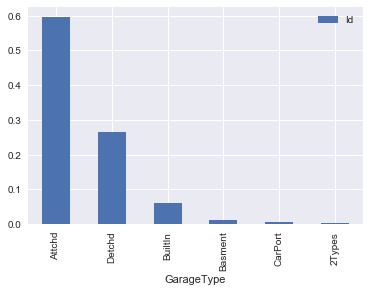

In [378]:
plot_category_distribution(train, 'GarageType')


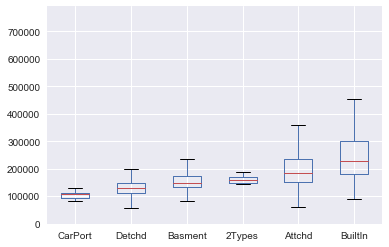

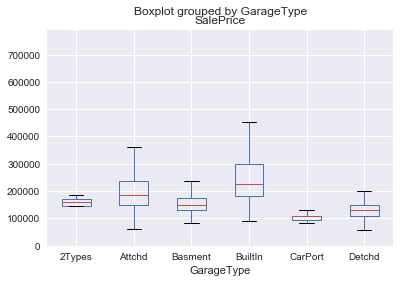

In [379]:
plot_category_correlation(train, 'GarageType')


## Year garage was built

Probably correlates with year house was built

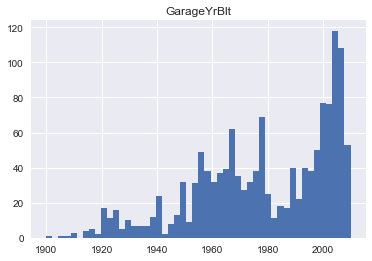

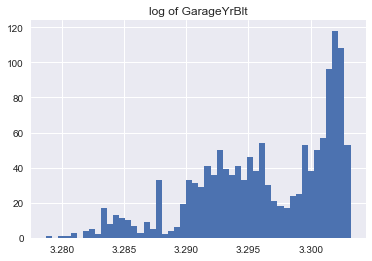

In [380]:
plot_histogram(train, 'GarageYrBlt', bins=50)


R^2 = 0.236548


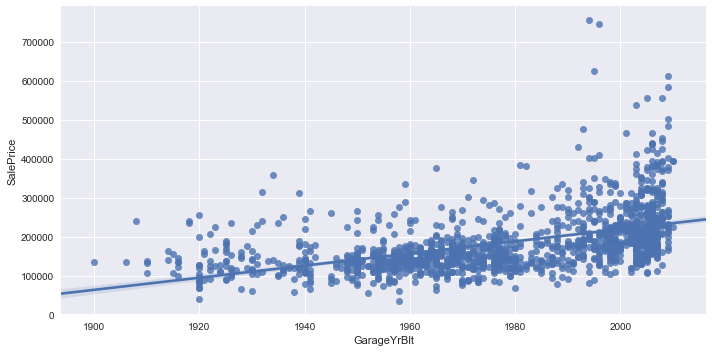

In [381]:
scatter_plot(train, 'GarageYrBlt', 'SalePrice')

## Interior finish of the garage

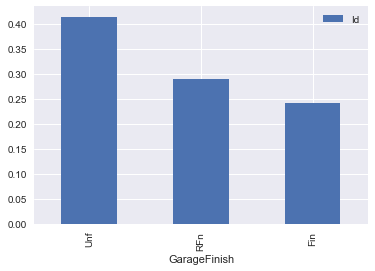

In [382]:
plot_category_distribution(train, 'GarageFinish')


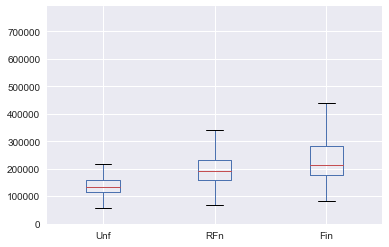

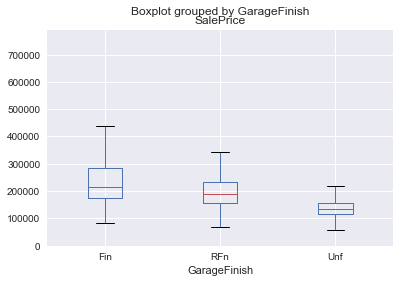

In [383]:
plot_category_correlation(train, 'GarageFinish')


## Size of garage in car capacity

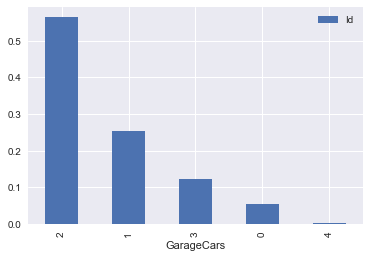

In [384]:
plot_category_distribution(train, 'GarageCars')


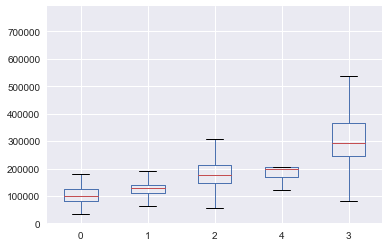

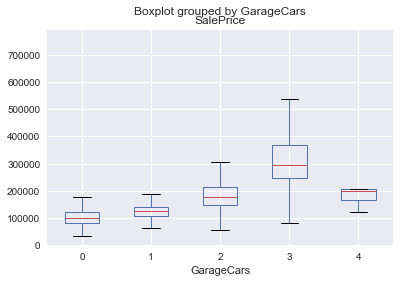

In [385]:
plot_category_correlation(train, 'GarageCars')


## Size of garage in square feet

Create feature has, does not have garage

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


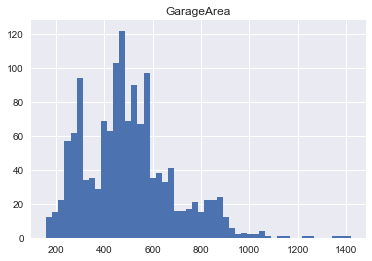

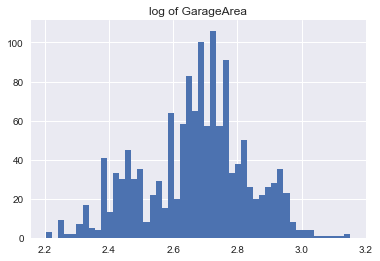

In [386]:
plot_histogram(train[train['GarageArea'] > 0], 'GarageArea', bins=50)


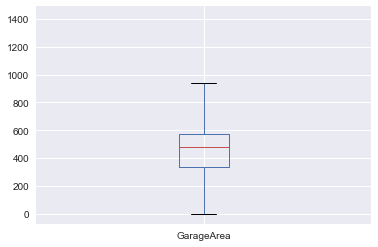

In [387]:
train.boxplot(column='GarageArea')


R^2 = 0.388667


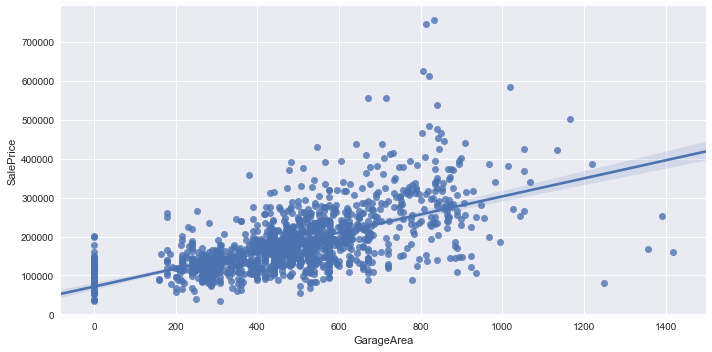

In [388]:
scatter_plot(train, 'GarageArea', 'SalePrice')

## HasGarage

This is a new feature

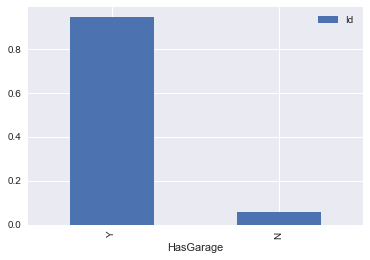

In [389]:
train['HasGarage'] = train['GarageArea'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasGarage')

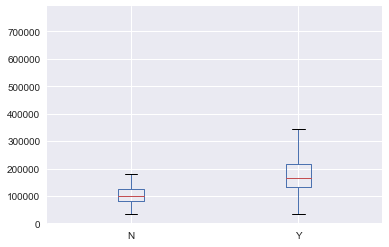

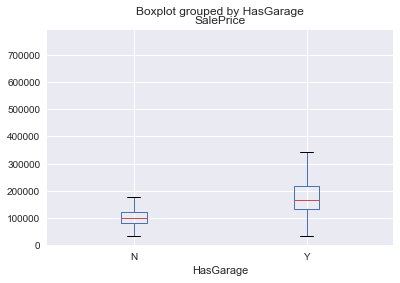

In [390]:
plot_category_correlation(train, 'HasGarage')

## StillAvailableArea

This is a new feature. Estimate of the lot area still available e.g. for construction or leisure.

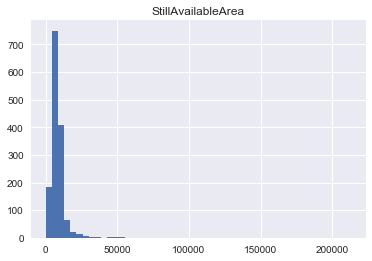

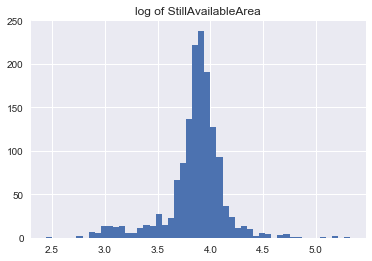

In [478]:
train['StillAvailableArea'] = train['LotArea'] - train['1stFlrSF'] - train['GarageArea']
plot_histogram(train, 'StillAvailableArea', bins=50)


R^2 = 0.053033


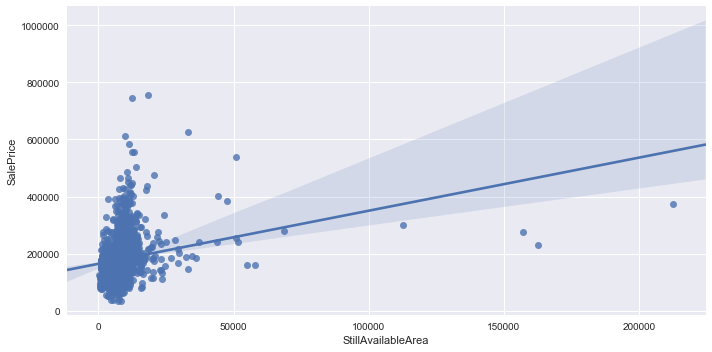

In [479]:
scatter_plot(train, 'StillAvailableArea', 'SalePrice')

## HasAvailableArea

This is a new feature.

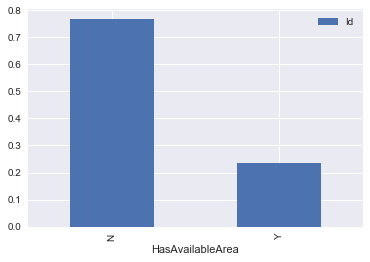

In [485]:
train['HasAvailableArea'] = train['StillAvailableArea'].apply(lambda x: 'N' if x < 10000 else 'Y')
plot_category_distribution(train, 'HasAvailableArea')

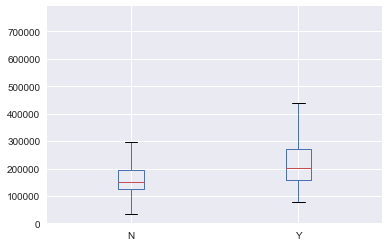

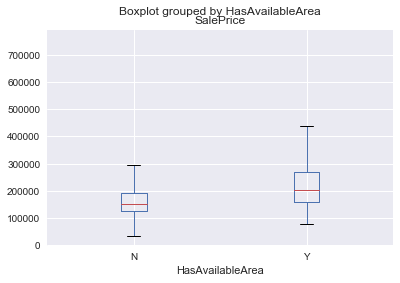

In [486]:
plot_category_correlation(train, 'HasAvailableArea')

## Garage quality

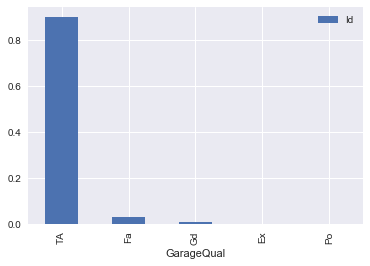

In [391]:
plot_category_distribution(train, 'GarageQual')


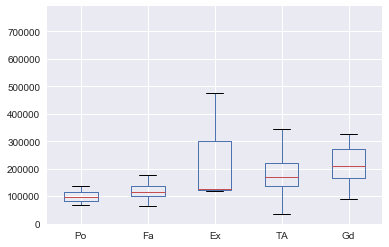

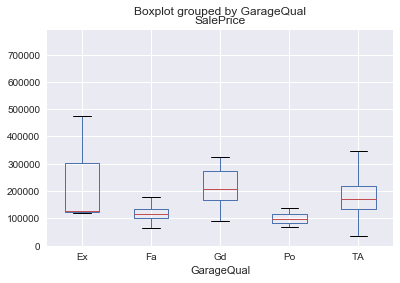

In [392]:
plot_category_correlation(train, 'GarageQual')


## Garage condition

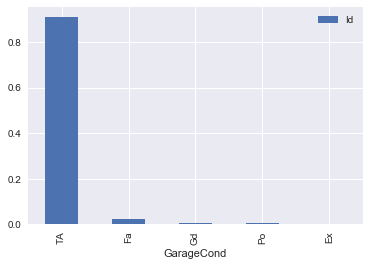

In [393]:
plot_category_distribution(train, 'GarageCond')


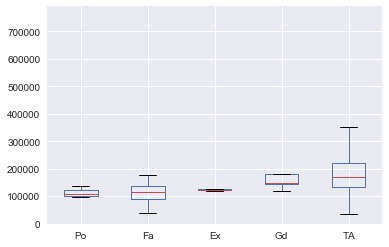

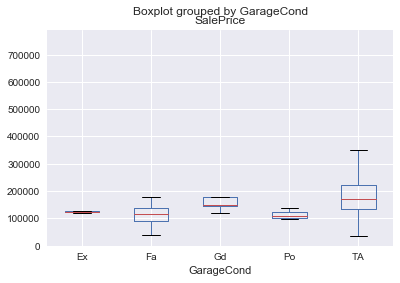

In [394]:
plot_category_correlation(train, 'GarageCond')


## Paved driveway

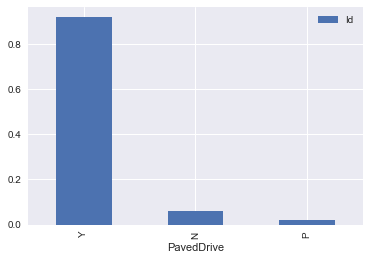

In [395]:
plot_category_distribution(train, 'PavedDrive')


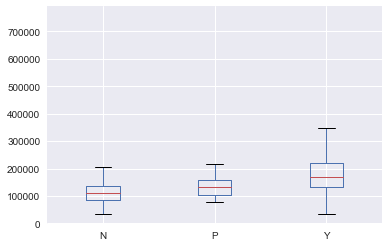

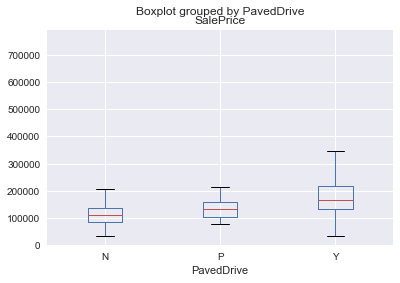

In [396]:
plot_category_correlation(train, 'PavedDrive')


## Wood deck area in square feet

Turn into binary feature?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


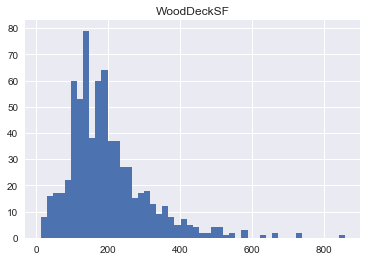

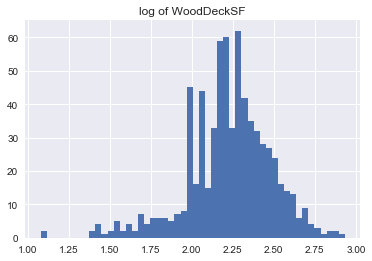

In [397]:
plot_histogram(train[train['WoodDeckSF'] > 0], 'WoodDeckSF', bins=50)


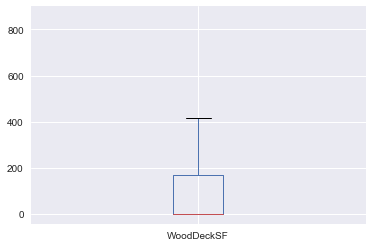

In [398]:
train.boxplot(column='WoodDeckSF')


R^2 = 0.105244


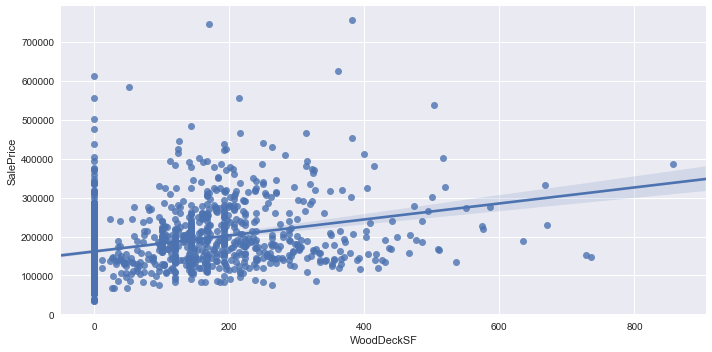

In [399]:
scatter_plot(train, 'WoodDeckSF', 'SalePrice')

## HasWoodDeck

This is a new feature

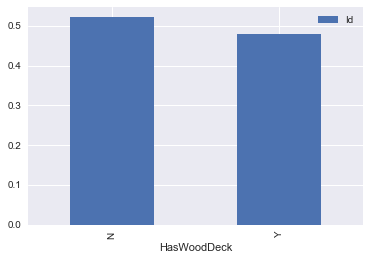

In [400]:
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasWoodDeck')

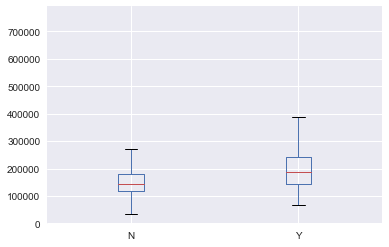

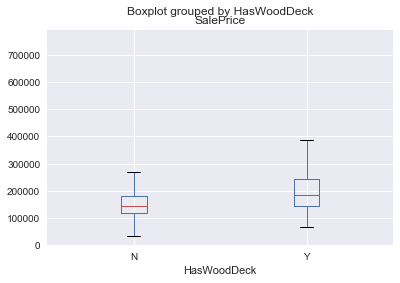

In [401]:
plot_category_correlation(train, 'HasWoodDeck')

##  Open porch area in square feet

Turn into binary feature?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


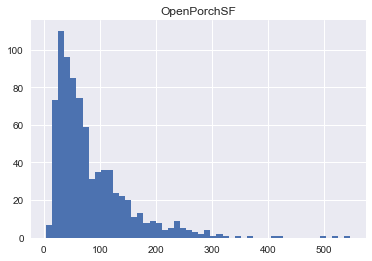

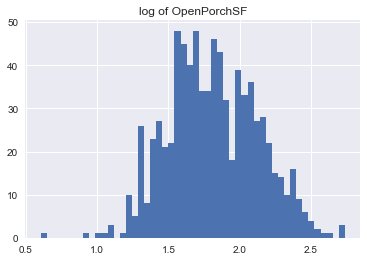

In [402]:
plot_histogram(train[train['OpenPorchSF'] > 0], 'OpenPorchSF', bins=50)


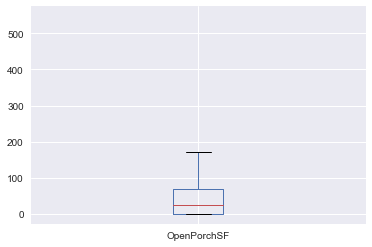

In [403]:
train.boxplot(column='OpenPorchSF')


R^2 = 0.099765


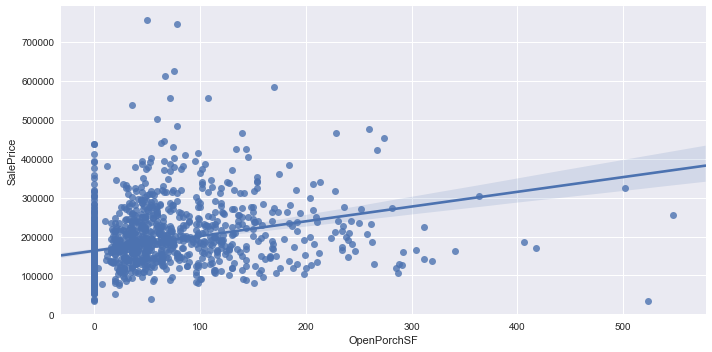

In [404]:
scatter_plot(train, 'OpenPorchSF', 'SalePrice')

## HasOpenPorch

This is a new feature

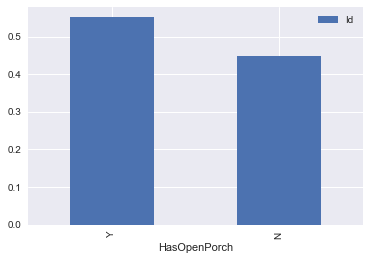

In [405]:
train['HasOpenPorch'] = train['OpenPorchSF'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasOpenPorch')

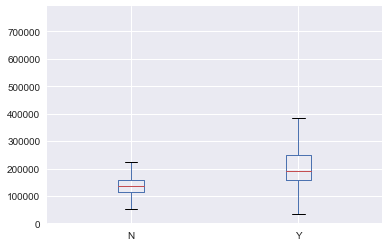

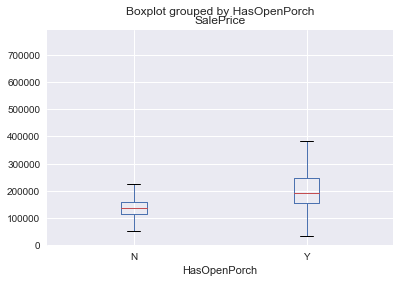

In [406]:
plot_category_correlation(train, 'HasOpenPorch')

## Enclosed porch area in square feet

Turn into binary feature?

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


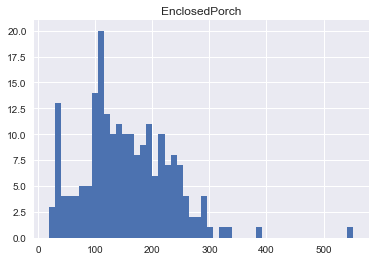

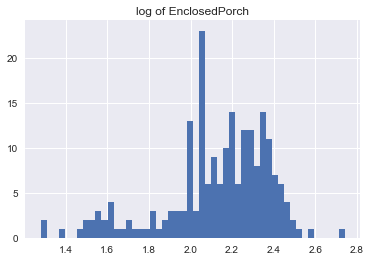

In [407]:
plot_histogram(train[train['EnclosedPorch'] > 0], 'EnclosedPorch', bins=50)


R^2 = 0.058215


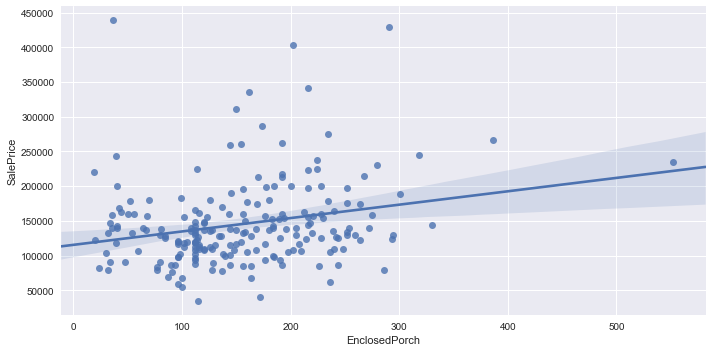

In [408]:
scatter_plot(train[train['EnclosedPorch'] > 0], 'EnclosedPorch', 'SalePrice')

## HasEnclosedPorch

This is a new feature

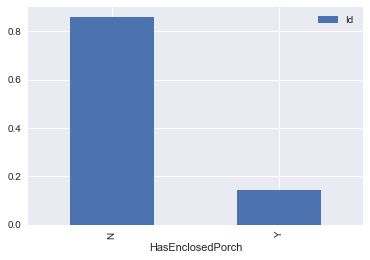

In [409]:
train['HasEnclosedPorch'] = train['EnclosedPorch'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasEnclosedPorch')

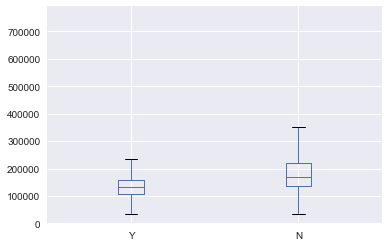

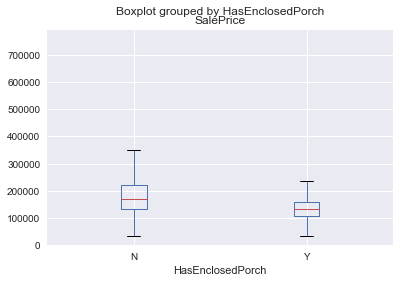

In [410]:
plot_category_correlation(train, 'HasEnclosedPorch')

## Three season porch area in square feet

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


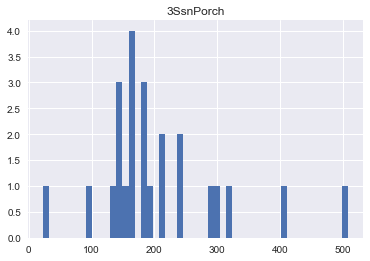

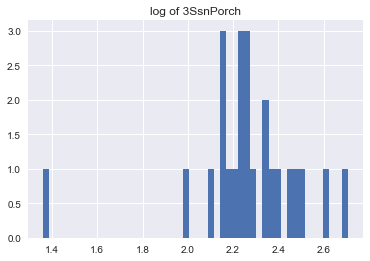

In [411]:
plot_histogram(train[train['3SsnPorch'] > 0], '3SsnPorch', bins=50)


R^2 = 0.004087


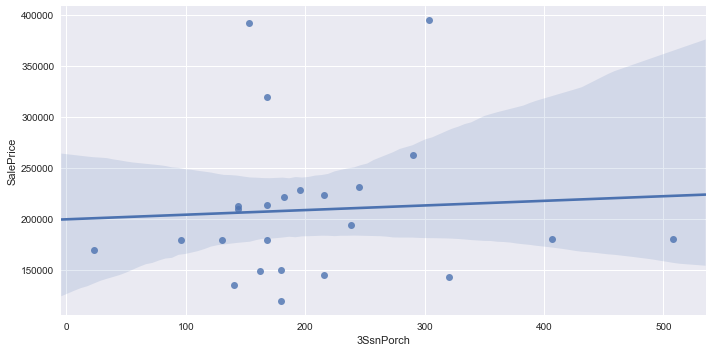

In [412]:
scatter_plot(train[train['3SsnPorch'] > 0], '3SsnPorch', 'SalePrice')

## HasThreeSeasonPorch

This is a new feature

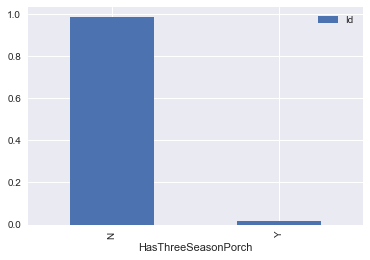

In [413]:
train['HasThreeSeasonPorch'] = train['3SsnPorch'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasThreeSeasonPorch')

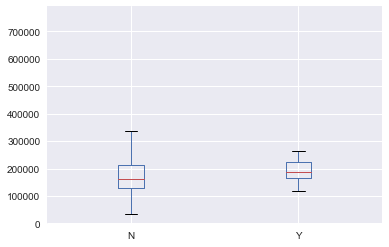

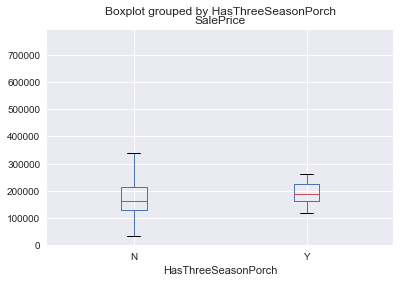

In [414]:
plot_category_correlation(train, 'HasThreeSeasonPorch')

## Screen porch area in square feet

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


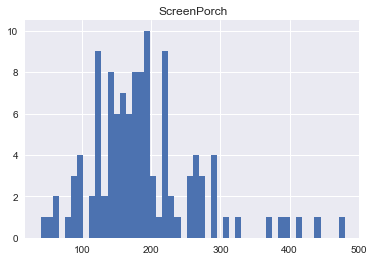

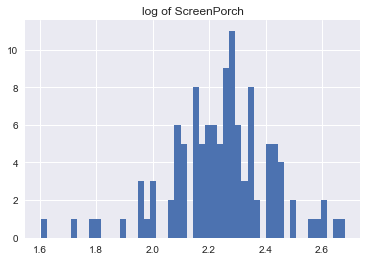

In [415]:
plot_histogram(train[train['ScreenPorch'] > 0], 'ScreenPorch', bins=50)


R^2 = 0.065245


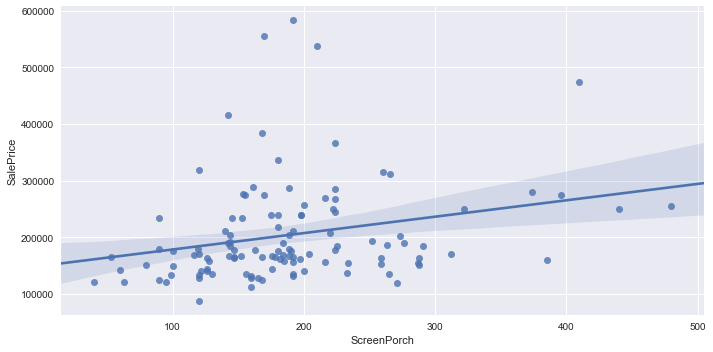

In [416]:
scatter_plot(train[train['ScreenPorch'] > 0], 'ScreenPorch', 'SalePrice')

## HasScreenPorch

This is a new feature

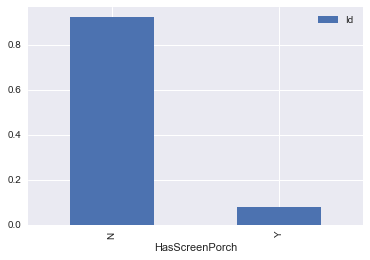

In [417]:
train['HasScreenPorch'] = train['ScreenPorch'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasScreenPorch')

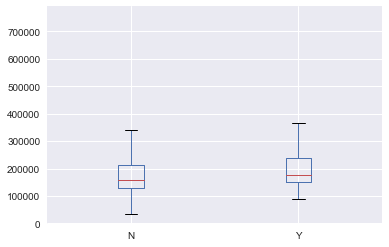

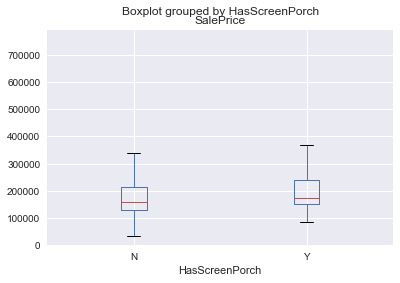

In [418]:
plot_category_correlation(train, 'HasScreenPorch')

## HasPorch
This is a new feature

In [419]:
#TBD

## Pool area in square feet

Turn into binary?

PoolArea    0
dtype: int64

R^2 = 0.008538


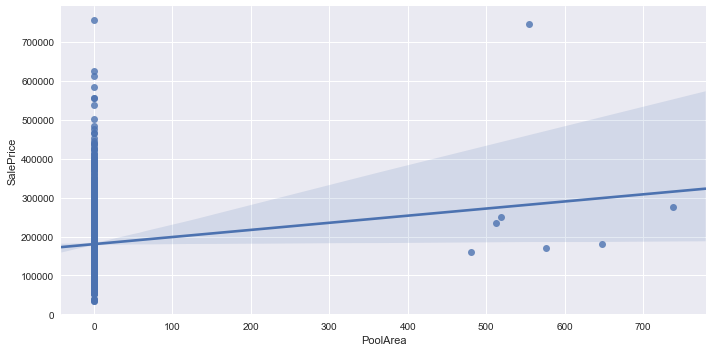

In [420]:
display(train[['PoolArea']].apply(lambda x: sum(x.isnull())))
scatter_plot(train, 'PoolArea', 'SalePrice')

## Has Pool

This is a new feature

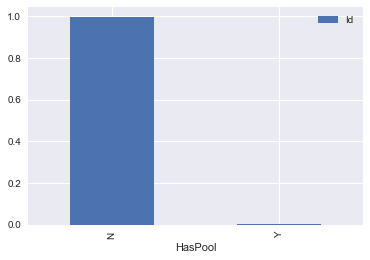

In [421]:
train['HasPool'] = train['PoolArea'].apply(lambda x: 'N' if x == 0 else 'Y')
plot_category_distribution(train, 'HasPool')

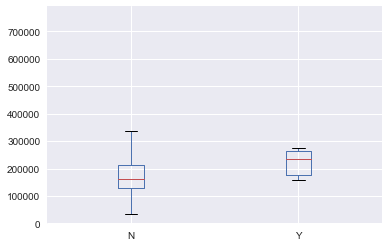

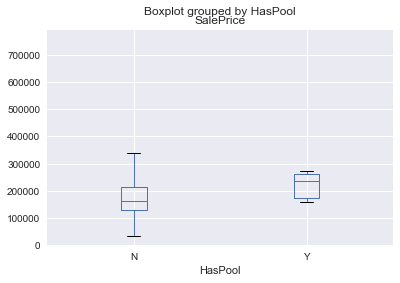

In [422]:
plot_category_correlation(train, 'HasPool')

## Pool quality

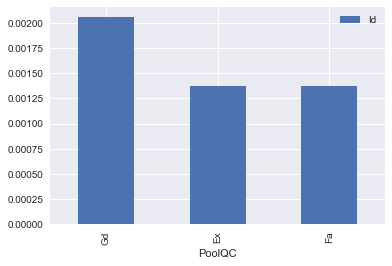

In [423]:
plot_category_distribution(train, 'PoolQC')


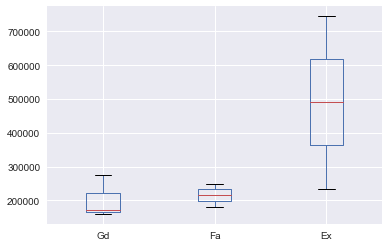

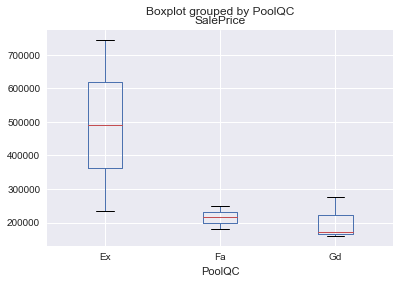

In [424]:
plot_category_correlation(train, 'PoolQC')


## Fence quality

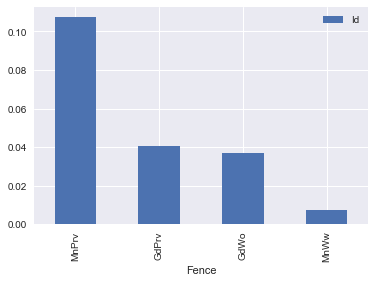

In [425]:
plot_category_distribution(train, 'Fence')


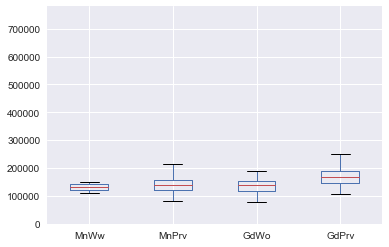

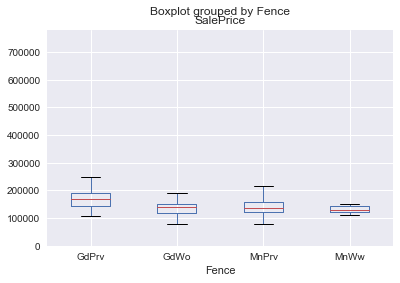

In [426]:
plot_category_correlation(train, 'Fence')


## Miscellaneous feature not covered in other categories

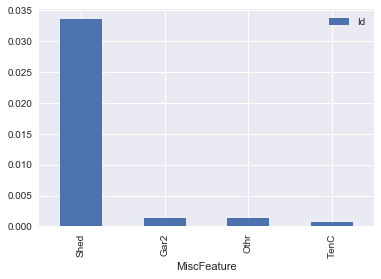

In [427]:
plot_category_distribution(train, 'MiscFeature')


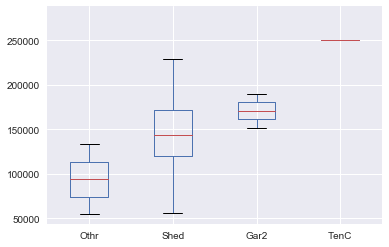

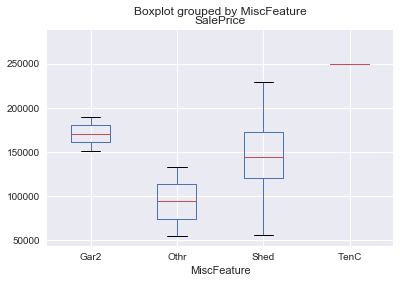

In [428]:
plot_category_correlation(train, 'MiscFeature')


## Month Sold

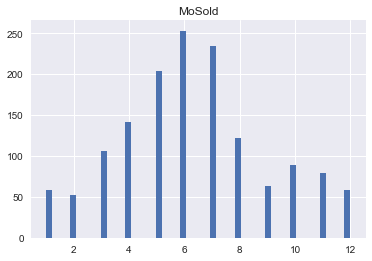

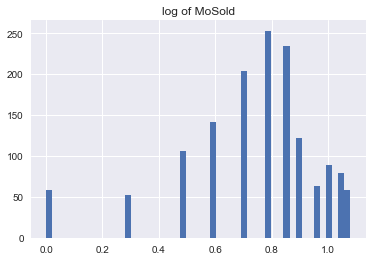

In [429]:
plot_histogram(train, 'MoSold', bins=50)


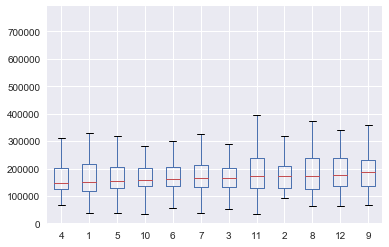

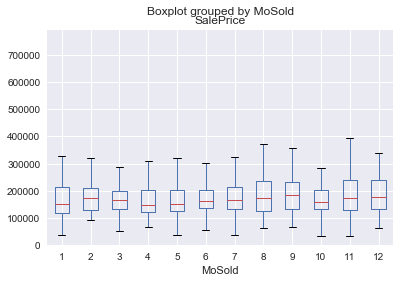

In [430]:
plot_category_correlation(train, 'MoSold')


## Year Sold

Create feature = number of years house had when sold

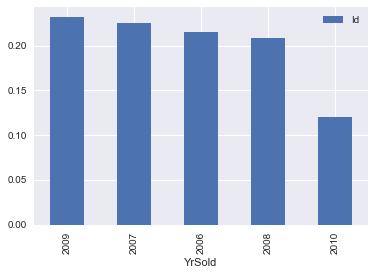

In [431]:
plot_category_distribution(train, 'YrSold')


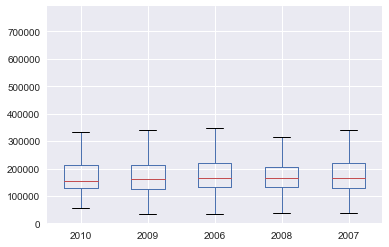

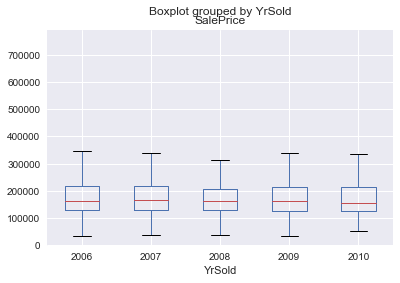

In [432]:
plot_category_correlation(train, 'YrSold')


## House age

This is a new feature

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


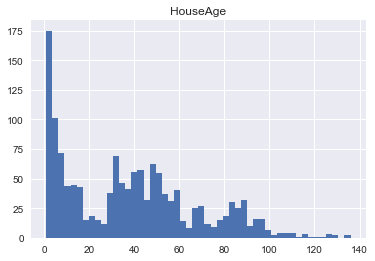

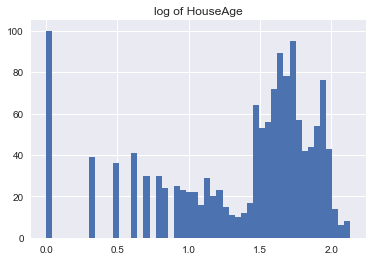

In [433]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
plot_histogram(train[train['HouseAge'] > 0], 'HouseAge', bins=50)

R^2 = 0.273896


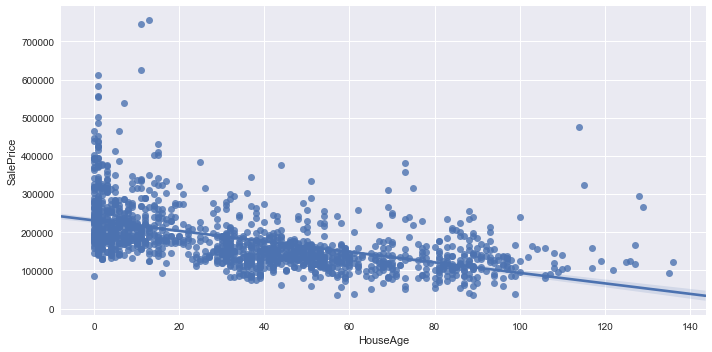

In [434]:
scatter_plot(train, 'HouseAge', 'SalePrice')

## NewHouse

This is a new feature

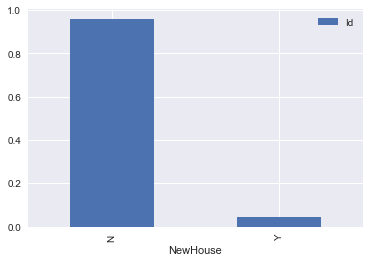

In [435]:
train['NewHouse'] = train['HouseAge'].apply(lambda x: 'Y' if x == 0 else 'N')
plot_category_distribution(train, 'NewHouse')

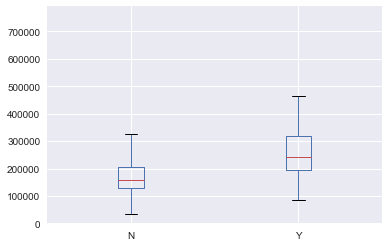

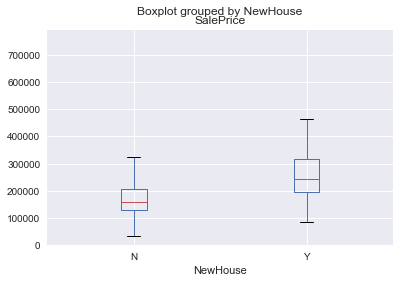

In [436]:
plot_category_correlation(train, 'NewHouse')


## HouseRemodelAge

This is a new feature

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


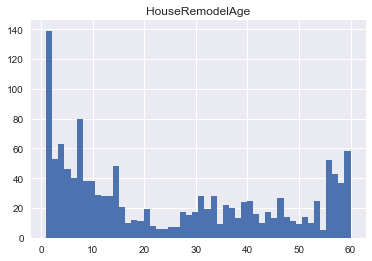

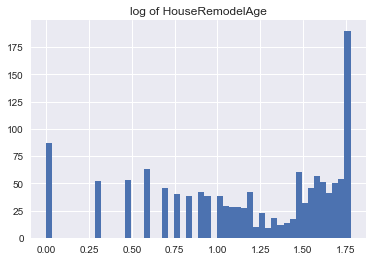

In [473]:
train['HouseRemodelAge'] = train['YrSold'] - train['YearRemodAdd']
plot_histogram(train[train['HouseRemodelAge'] > 0], 'HouseRemodelAge', bins=50)

R^2 = 0.259161


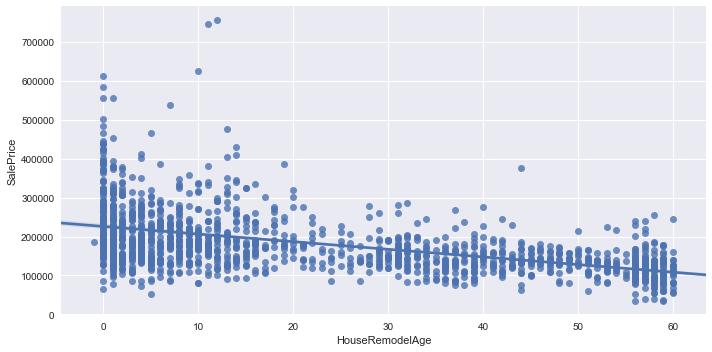

In [474]:
scatter_plot(train, 'HouseRemodelAge', 'SalePrice')

## RecentlyRemodeled

This is a new feature

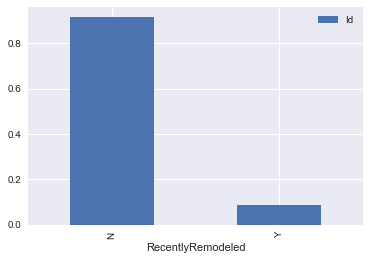

In [475]:
train['RecentlyRemodeled'] = train['HouseRemodelAge'].apply(lambda x: 'Y' if x == 0 else 'N')
plot_category_distribution(train, 'RecentlyRemodeled')

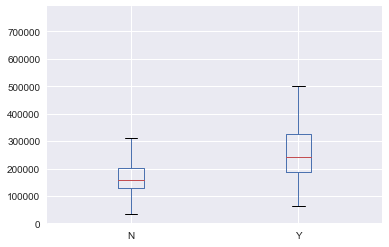

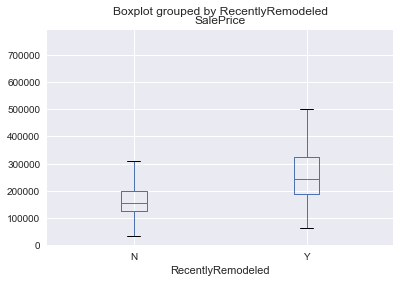

In [476]:
plot_category_correlation(train, 'RecentlyRemodeled')


## GarageAge

This is a new feature

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


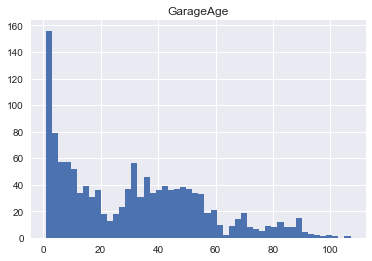

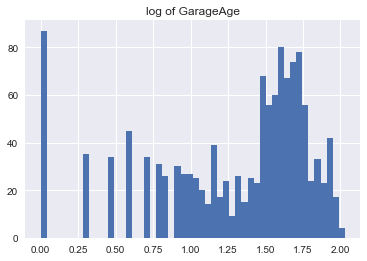

In [441]:
train['GarageAge'] = train['YrSold'] - train['GarageYrBlt']
plot_histogram(train[train['GarageAge'] > 0], 'GarageAge', bins=50)

R^2 = 0.237236


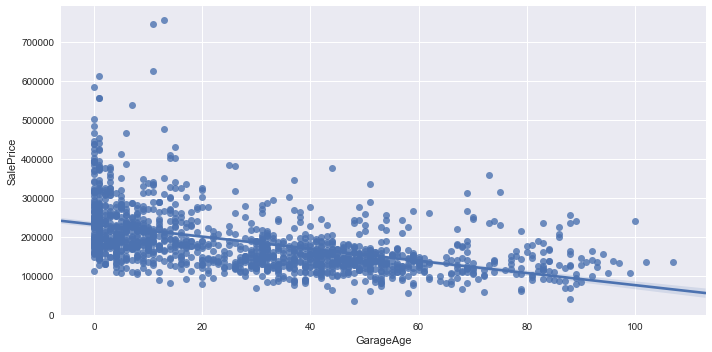

In [442]:
scatter_plot(train, 'GarageAge', 'SalePrice')

## NewGarage

This is a new feature

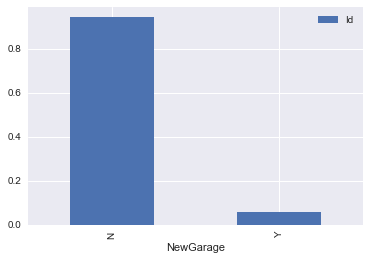

In [443]:
train['NewGarage'] = train['GarageAge'].apply(lambda x: 'Y' if x == 0 else 'N')
plot_category_distribution(train, 'NewGarage')

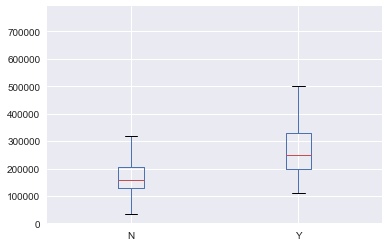

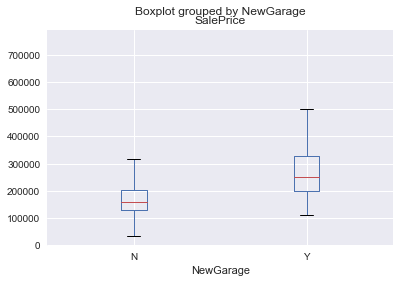

In [444]:
plot_category_correlation(train, 'NewGarage')


## Type of sale

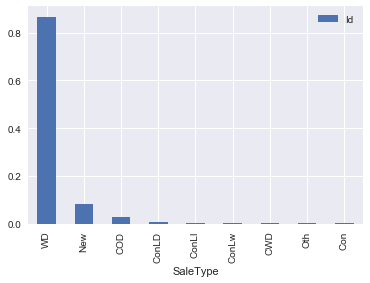

In [437]:
plot_category_distribution(train, 'SaleType')


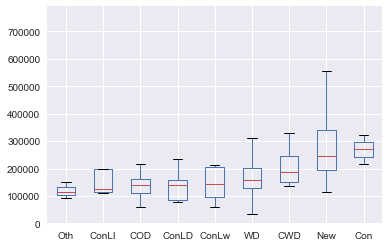

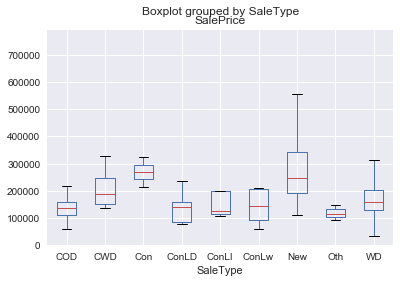

In [438]:
plot_category_correlation(train, 'SaleType')


## Condition of sale

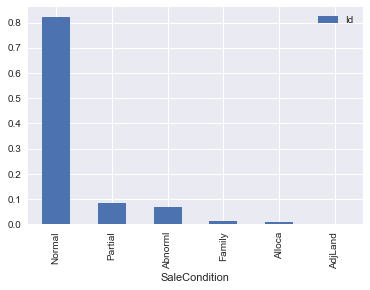

In [439]:
plot_category_distribution(train, 'SaleCondition')


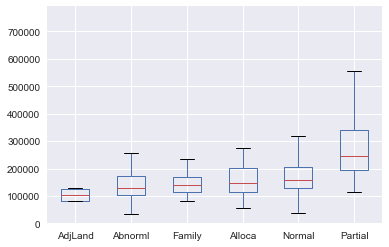

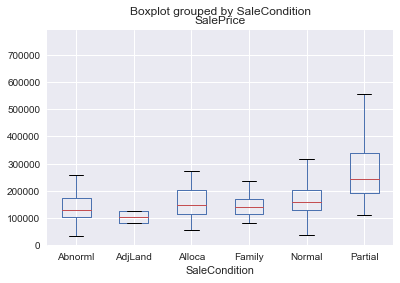

In [440]:
plot_category_correlation(train, 'SaleCondition')
    

# TODO
- add new features and "describe" them as well, for example, month and date into time, and order by time to see if there is a correlation
- add q-q plot to histograms
- x-axis of boxplots
- correlation matrix: correlation between features, not just the column we are trying to predict 
- compare test set with train set, feature by feature. similar characteristics?
- remove useless features
- clean data for training
- preprocess each feature accordingly
- select features